In [1]:
import os # set working path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime # time utilities
from sklearn.linear_model import LinearRegression  # model
import jieba  # tokenization
import jieba.analyse
import imageio # used for word cloud generation
from wordcloud import WordCloud # word cloud

# Chinese font encoding
plt.rcParams['font.sans-serif']='simhei'
plt.rcParams['axes.unicode_minus']=False

In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 1) load the font file in your project (SimHei.ttf)
font_path = os.path.join(os.getcwd(), "SimHei.ttf")
font_manager.fontManager.addfont(font_path)

# 2) set global Chinese font
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False


In [3]:
cwd_path = os.path.abspath('')

# Pest Control Market Potential Analysis

## Load Data

- Read transaction amounts for each subcategory and merge them

In [4]:
filenames = ['灭鼠杀虫剂市场近三年交易额.xlsx',
 '电蚊香套装市场近三年交易额.xlsx',
 '盘香灭蟑香蚊香盘市场近三年交易额.xlsx',
 '蚊香加热器市场近三年交易额.xlsx',
 '蚊香液市场近三年交易额.xlsx',
 '蚊香片市场近三年交易额.xlsx',
 '防霉防蛀片市场近三年交易额.xlsx']

In [5]:
"盘香灭蟑香蚊香盘市场近三年交易额.xlsx".split(".")[0].replace("市场近三年交易额", "")

'盘香灭蟑香蚊香盘'

- Define a custom function to read a single xlsx file: extract file name as column name and normalize date format

In [6]:
def load_xlsx(filename):
    # read file
    file_path = os.path.join(cwd_path,"data","驱虫剂市场",filename)
    df = pd.read_excel(file_path)
    # normalize date format
    if df['时间'].dtypes == 'int64':
        df['时间'] = pd.to_datetime(df['时间'],unit='D',origin=pd.Timestamp('1899-12-30'))
    # extract subcategory name
    colname = filename.split(".")[0].replace("市场近三年交易额", "")
    # rename column to subcategory name
    df.rename(columns={df.columns[1]:colname},inplace=True)
    # set time column as index
    df = df.set_index('时间')
    return df

In [7]:
dfs = [load_xlsx(i) for i in filenames]

In [8]:
df = pd.concat(dfs,axis=1).reset_index()
df

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43
2,2018-08-01,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44
3,2018-07-01,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06
4,2018-06-01,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98
5,2018-05-01,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44
6,2018-04-01,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60
7,2018-03-01,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02
8,2018-02-01,2.292138e+07,33232.95,545917.66,75714.46,2.235774e+06,218915.63,1393948.47
9,2018-01-01,3.653873e+07,54305.20,592663.20,86670.45,1.759451e+06,298146.11,2607776.07


## Complete Missing Data

Extract month values to build model indexes

In [9]:
month = df['时间'].dt.month
month

0     10
1      9
2      8
3      7
4      6
5      5
6      4
7      3
8      2
9      1
10    12
11    11
12    10
13     9
14     8
15     7
16     6
17     5
18     4
19     3
20     2
21     1
22    12
23    11
24    10
25     9
26     8
27     7
28     6
29     5
30     4
31     3
32     2
33     1
34    12
35    11
Name: 时间, dtype: int32

- Iteratively predict sales for November and December 2018

In [10]:
newrow = [df]
for i in [11,12]:
    # extract month-level data
    dm = df[month == i]   #2015.11  2016.11  2017.11 
    # training X is year
    xtrain = np.array(dm['时间'].dt.year).reshape(-1,1)
    # test y corresponds to newly added rows/dates
    ytest = [datetime.datetime(2018,i,1)]
    for j in range(1,len(dm.columns)):
        # training y is the selected column
        ytrain = np.array(dm.iloc[:,j]).reshape(-1,1)
        # fit regression model
        lm = LinearRegression().fit(xtrain,ytrain)
        # predict sales yhat when test x is 2018
        yhat = lm.predict(np.array([2018]).reshape(-1,1))
        ytest.append(round(yhat[0][0],2))
    # assign predicted values to corresponding columns
    print(ytest)
    newrow.append(pd.DataFrame([dict(zip(df.columns,ytest))]))
df = pd.concat(newrow, ignore_index=True)
df

[datetime.datetime(2018, 11, 1, 0, 0), np.float64(71752495.99), np.float64(38692.61), np.float64(1801318.82), np.float64(193874.39), np.float64(5543203.83), np.float64(776627.04), np.float64(6678677.55)]
[datetime.datetime(2018, 12, 1, 0, 0), np.float64(52567630.68), np.float64(50204.53), np.float64(928554.26), np.float64(86849.17), np.float64(3081491.99), np.float64(426812.59), np.float64(3958717.58)]


,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43
2,2018-08-01,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44
3,2018-07-01,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06
4,2018-06-01,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98
5,2018-05-01,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44
6,2018-04-01,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60
7,2018-03-01,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02
8,2018-02-01,2.292138e+07,33232.95,545917.66,75714.46,2.235774e+06,218915.63,1393948.47
9,2018-01-01,3.653873e+07,54305.20,592663.20,86670.45,1.759451e+06,298146.11,2607776.07


In [11]:
# drop original index
df.reset_index(drop=True,inplace=True)

In [12]:
# remove data for 2015
df = df[df['时间'].dt.year != 2015].copy()
df

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43
2,2018-08-01,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44
3,2018-07-01,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06
4,2018-06-01,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98
5,2018-05-01,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44
6,2018-04-01,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60
7,2018-03-01,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02
8,2018-02-01,2.292138e+07,33232.95,545917.66,75714.46,2.235774e+06,218915.63,1393948.47
9,2018-01-01,3.653873e+07,54305.20,592663.20,86670.45,1.759451e+06,298146.11,2607776.07


## Overall Market Analysis
1. Analyze the overall trend of the total market
2. Analyze sales share and trend changes of each subcategory market
3. Analyze market concentration and whether a monopoly exists

In [13]:
df['整个市场'] = df[df.columns[1:]].sum(1) # total transaction amount column
df

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片,整个市场
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59,1.356363e+08
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43,1.724211e+08
2,2018-08-01,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44,1.924731e+08
3,2018-07-01,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06,2.182924e+08
4,2018-06-01,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98,2.600962e+08
5,2018-05-01,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44,2.868459e+08
6,2018-04-01,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60,1.730164e+08
7,2018-03-01,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02,1.040821e+08
8,2018-02-01,2.292138e+07,33232.95,545917.66,75714.46,2.235774e+06,218915.63,1393948.47,2.742488e+07
9,2018-01-01,3.653873e+07,54305.20,592663.20,86670.45,1.759451e+06,298146.11,2607776.07,4.193774e+07


### Market Trend Description
- Create a new column from the row-wise sum of transaction amounts across all markets
- Extract year values into a new column

In [14]:
df.sort_values(by='时间',ascending=False)

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片,整个市场
37,2018-12-01,5.256763e+07,50204.53,928554.26,86849.17,3.081492e+06,426812.59,3958717.58,6.110026e+07
36,2018-11-01,7.175250e+07,38692.61,1801318.82,193874.39,5.543204e+06,776627.04,6678677.55,8.678489e+07
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59,1.356363e+08
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43,1.724211e+08
2,2018-08-01,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44,1.924731e+08
3,2018-07-01,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06,2.182924e+08
4,2018-06-01,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98,2.600962e+08
5,2018-05-01,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44,2.868459e+08
6,2018-04-01,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60,1.730164e+08
7,2018-03-01,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02,1.040821e+08


In [15]:
df.insert(1,'year',df['时间'].dt.year) # year column
df

,时间,year,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片,整个市场
0,2018-10-01,2018,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59,1.356363e+08
1,2018-09-01,2018,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43,1.724211e+08
2,2018-08-01,2018,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44,1.924731e+08
3,2018-07-01,2018,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06,2.182924e+08
4,2018-06-01,2018,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98,2.600962e+08
5,2018-05-01,2018,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44,2.868459e+08
6,2018-04-01,2018,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60,1.730164e+08
7,2018-03-01,2018,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02,1.040821e+08
8,2018-02-01,2018,2.292138e+07,33232.95,545917.66,75714.46,2.235774e+06,218915.63,1393948.47,2.742488e+07
9,2018-01-01,2018,3.653873e+07,54305.20,592663.20,86670.45,1.759451e+06,298146.11,2607776.07,4.193774e+07


In [16]:
byyear = df[df.columns[1:]].groupby(['year'], as_index=False, observed=False).sum(numeric_only=True)
byyear

,year,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片,整个市场
0,2016,6.080471e+08,7666572.12,4.785285e+07,5905204.71,1.704905e+08,27980839.47,50023001.94,9.179661e+08
1,2017,8.477740e+08,9377531.68,8.635539e+07,10552841.02,3.300656e+08,49068587.96,62678822.18,1.395873e+09
2,2018,1.137893e+09,4537682.09,1.180885e+08,16836723.43,3.582077e+08,51845921.56,72701365.23,1.760111e+09


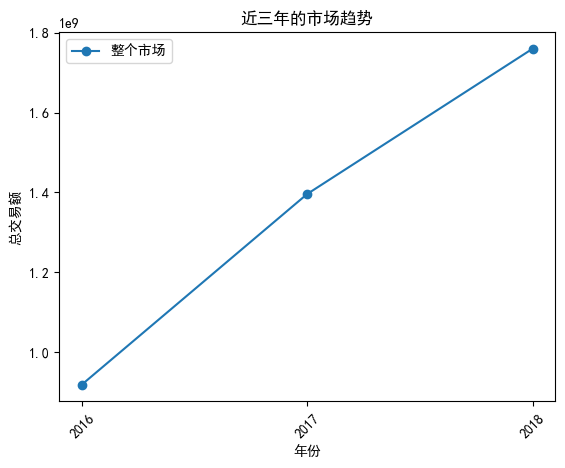

In [17]:
byyear.plot.line(x="year",y="整个市场",marker='o')
plt.title('近三年的市场趋势')
plt.xticks(byyear.year,rotation=45)
plt.xlabel('年份')
plt.ylabel('总交易额')
plt.show()

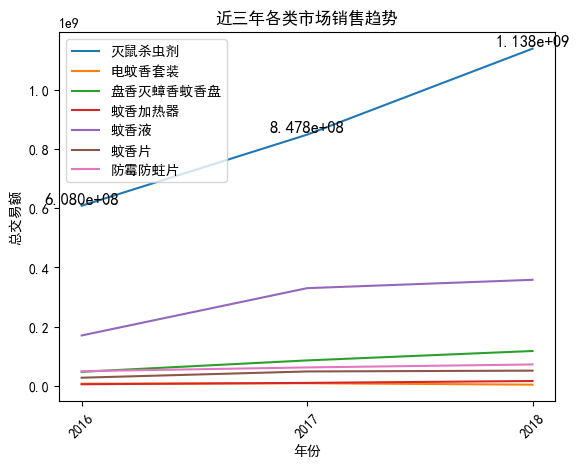

In [18]:
# analyze sales trends of each market segment
byyear.set_index('year').iloc[:,:-1].plot.line()
plt.title('近三年各类市场销售趋势')
plt.xticks(byyear.year,rotation=45)
# add labels at specified positions
for a,b in zip(byyear.year,byyear['灭鼠杀虫剂']):
    plt.text(a,b,'%.3e'% b, ha='center',va='bottom',size=12)
plt.xlabel('年份')
plt.ylabel('总交易额')
plt.show()

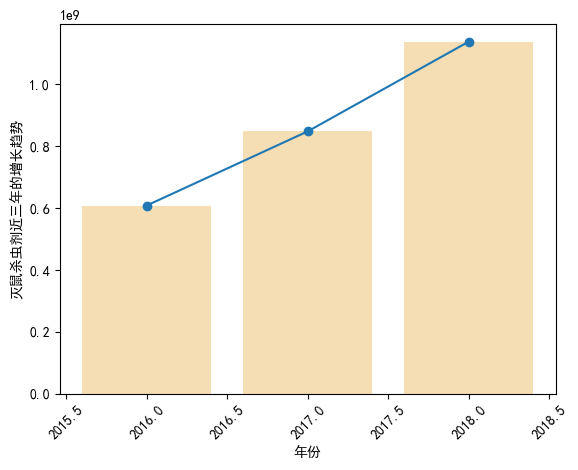

In [19]:
# plot bar chart
plt.bar(byyear['year'], byyear['灭鼠杀虫剂'], color='wheat')
# plot line chart
plt.plot(byyear['year'], byyear['灭鼠杀虫剂'], marker='o')
plt.xlabel('年份')
plt.ylabel('灭鼠杀虫剂近三年的增长趋势')
plt.xticks(rotation=45)
plt.show()

In [20]:
# calculate yearly share of each submarket
byyear_per = byyear.iloc[:,1:-1].div(byyear["整个市场"],axis=0)
byyear_per.index = byyear.year
byyear_per

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
year,,,,,,,
2016,0.662385,0.008352,0.052129,0.006433,0.185726,0.030481,0.054493
2017,0.607343,0.006718,0.061865,0.007560,0.236458,0.035153,0.044903
2018,0.646489,0.002578,0.067092,0.009566,0.203514,0.029456,0.041305


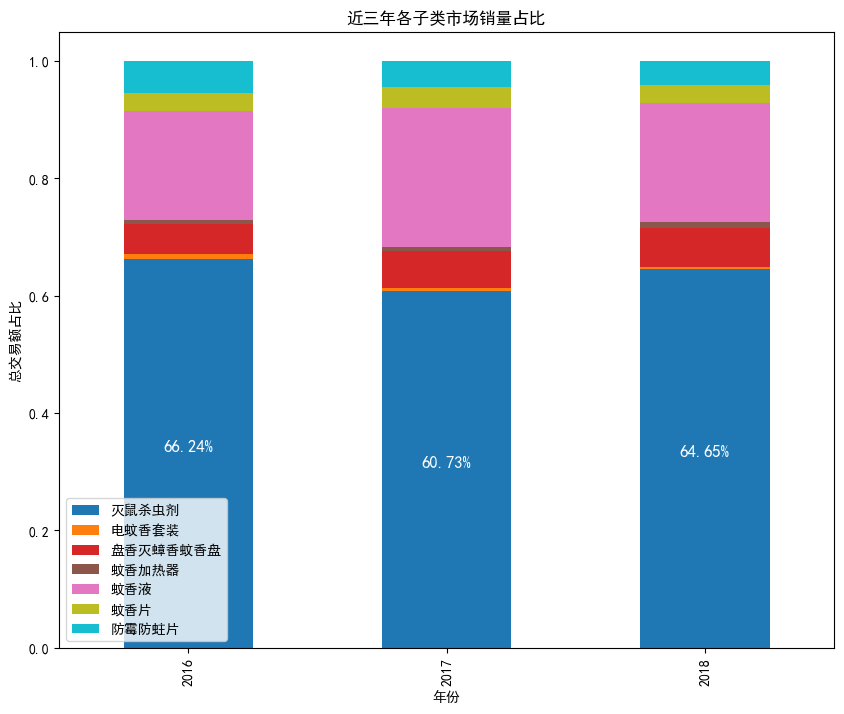

In [21]:
#stacked=True  
byyear_per.plot(kind='bar',stacked=True,figsize=(10,8),colormap='tab10')

for a,b in zip(range(len(byyear_per)),byyear_per['灭鼠杀虫剂']):
    plt.text(a,b/2,f'{b*100:.2f}%', ha='center',va='bottom',size=12,color='white')


plt.xlabel('年份')
plt.ylabel('总交易额占比')
plt.title('近三年各子类市场销量占比')
plt.show()

In [22]:
# check yearly growth by market segment
byyear

,year,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片,整个市场
0,2016,6.080471e+08,7666572.12,4.785285e+07,5905204.71,1.704905e+08,27980839.47,50023001.94,9.179661e+08
1,2017,8.477740e+08,9377531.68,8.635539e+07,10552841.02,3.300656e+08,49068587.96,62678822.18,1.395873e+09
2,2018,1.137893e+09,4537682.09,1.180885e+08,16836723.43,3.582077e+08,51845921.56,72701365.23,1.760111e+09


In [23]:
# select the middle 7 columns
byyear0 = byyear.iloc[:,1:-1] 
byyear0.diff()# first-order difference: 17-16, 18-17

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.397269e+08,1710959.56,38502539.41,4647636.31,1.595750e+08,21087748.49,12655820.24
2,2.901194e+08,-4839849.59,31733116.21,6283882.41,2.814215e+07,2777333.60,10022543.05


In [24]:
# calculate annual growth
byyear0 = byyear.iloc[:,1:-1] 
byyear_diff = byyear0.diff().iloc[1:,:].reset_index(drop=True)/byyear0.iloc[:2,:]
byyear_diff.index = ['16-17','17-18']
byyear_diff

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
16-17,0.394257,0.223171,0.804603,0.787041,0.935976,0.753650,0.253000
17-18,0.342213,-0.516111,0.367471,0.595468,0.085262,0.056601,0.159903


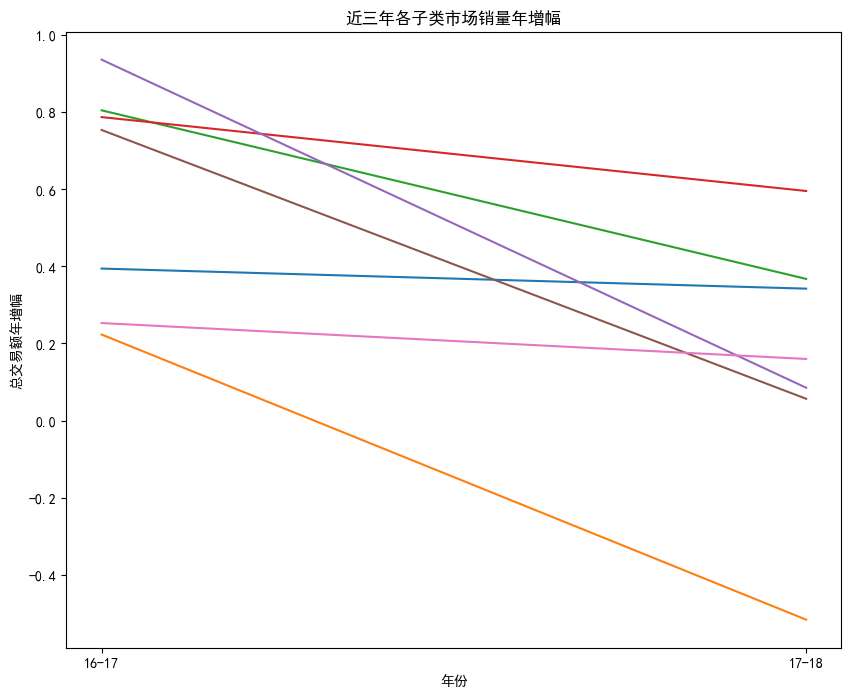

In [25]:
# visualize with plots
fig, ax = plt.subplots(figsize=(10,8))
# plot line chart
ax.plot(byyear_diff)
# set x-axis ticks and labels
ax.set_xticks(range(len(byyear_diff.index)))
ax.set_xticklabels(byyear_diff.index)
plt.title('近三年各子类市场销量年增幅')
plt.xlabel('年份')
plt.ylabel('总交易额年增幅')
plt.show()

### Market Concentration Description

In [26]:
file_path = os.path.join(cwd_path,"data","驱虫剂市场","top100品牌数据.xlsx")
df1 = pd.read_excel(file_path)
df1.isna().mean()

品牌        0.0
行业排名      0.0
交易指数      0.0
交易增长幅度    0.0
支付转化指数    0.0
操作        0.0
dtype: float64

In [27]:
df1.head()

,品牌,行业排名,交易指数,交易增长幅度,支付转化指数,操作
0,PREMISE/拜灭士,1,530344,-0.3235,1521,趋势分析
1,科凌虫控,2,474937,-0.1910,1581,趋势分析
2,ARS/安速,3,402372,-0.2682,1448,趋势分析
3,思乐智,4,360780,0.2056,841,趋势分析
4,希诺,5,346656,-0.1085,1865,趋势分析


In [28]:
df1.describe(include='all')

,品牌,行业排名,交易指数,交易增长幅度,支付转化指数,操作
count,100,100.000000,100.000000,100.000000,100.000000,100
unique,100,NaN,NaN,NaN,NaN,1
top,PREMISE/拜灭士,NaN,NaN,NaN,NaN,趋势分析
freq,1,NaN,NaN,NaN,NaN,100
mean,NaN,50.500000,147327.560000,0.395790,1247.870000,NaN
std,NaN,29.011492,88177.182391,2.038278,350.304014,NaN
min,NaN,1.000000,65194.000000,-0.781900,577.000000,NaN
25%,NaN,25.750000,86129.000000,-0.266325,967.750000,NaN
50%,NaN,50.500000,118682.500000,-0.061800,1245.000000,NaN
75%,NaN,75.250000,163373.250000,0.334350,1491.500000,NaN


In [29]:
# generate transaction-index share to describe market share
df1['交易指数占比'] = df1['交易指数']/df1['交易指数'].sum()

In [30]:
df1['交易指数占比']

0     0.035998
1     0.032237
2     0.027311
3     0.024488
4     0.023530
        ...   
95    0.004603
96    0.004492
97    0.004465
98    0.004447
99    0.004425
Name: 交易指数占比, Length: 100, dtype: float64

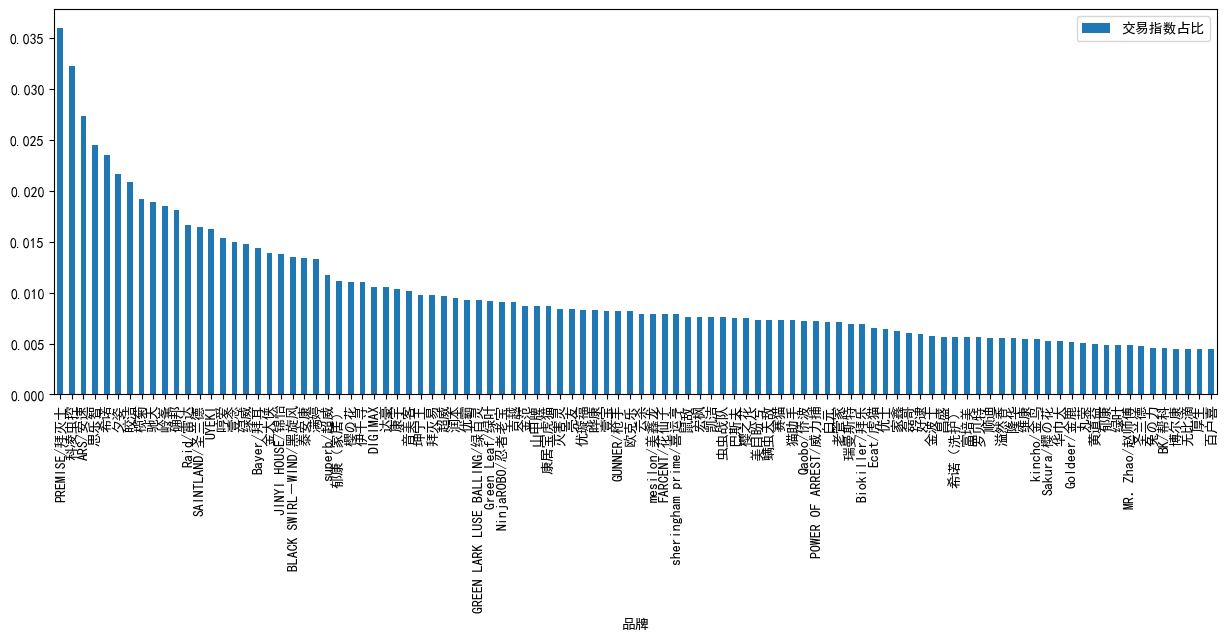

In [31]:
df1.plot(x='品牌',y='交易指数占比',kind='bar',figsize=(15,5))
plt.show()

# Rodenticide and Insecticide Market Opportunity Analysis

In [32]:
## HHI
HHI = sum(df1['交易指数占比']**2)
print(HHI)

0.013546334007208916


## Load and Clean Data

In [33]:
filename1 = ["螨.xlsx","灭鼠.xlsx","杀虫.xlsx", "虱子.xlsx", "蟑螂.xlsx"]
dfs1 = [pd.read_excel(os.path.join(cwd_path,"data","灭鼠杀虫剂细分市场",i)) for i in filename1]
df2 = pd.concat(dfs1,sort=False)
df2.head()

,类别,时间,页码,排名,链接,主图链接,主图视频链接,宝贝标题,宝贝ID,销量（人数）,...,包装数量,农药登记号,容量,使用时间,生产厂家,宝贝成份,规格：,樟脑,包装,产品名
0,螨,2018/11/22 19:22:32,1,13,https://item.taobao.com/item.htm?id=565907801425,https://gw3.alicdn.com/bao/uploaded/i1/2743274...,https://cloud.video.taobao.com/play/u/27432746...,家用除螨虫喷雾剂床上用品去螨虫神器免洗祛防杀螨贴中草药除螨包,565907801425,28941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,螨,2018/11/22 19:22:26,1,9,https://item.taobao.com/item.htm?id=564931016067,https://gw3.alicdn.com/bao/uploaded/i2/2901658...,https://cloud.video.taobao.com/play/u/29016587...,郁康除螨包天然去螨包去螨虫包床上用品螨虫贴除螨垫除螨虫除螨贴,564931016067,16201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,螨,2018/11/22 19:22:20,1,6,https://item.taobao.com/item.htm?id=557016005608,https://gw3.alicdn.com/bao/uploaded/i3/2851586...,https://cloud.video.taobao.com/play/u/28515864...,日本家用除螨虫喷雾喷剂床上用品去螨虫免洗祛防杀螨贴包神器杀菌,557016005608,14356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,螨,2018/11/22 19:22:59,2,22,https://item.taobao.com/item.htm?id=557016005608,https://img.alicdn.com/imgextra/i1/120258465/O...,https://cloud.video.taobao.com/play/u/28515864...,除螨喷雾剂床上免洗去螨虫贴杀菌中草药除螨,557016005608,14356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,螨,2018/11/22 19:45:23,61,22,https://item.taobao.com/item.htm?id=558955314064,https://img.alicdn.com/imgextra/i4/52226330/O1...,https://cloud.video.taobao.com/play/u/19730748...,杰诺吸尘器家用洗车小型强力地毯手持式干湿,558955314064,9461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6556 entries, 0 to 1742
Columns: 229 entries, 类别 to 产品名
dtypes: float64(129), int64(5), object(95)
memory usage: 11.5+ MB


In [35]:
# check missing values
df2.isna().mean()

类别      0.0
时间      0.0
页码      0.0
排名      0.0
链接      0.0
       ... 
宝贝成份    1.0
规格：     1.0
樟脑      1.0
包装      1.0
产品名     1.0
Length: 229, dtype: float64

- If a feature has more than 98% missing values, remove it as it is not meaningful for overall analysis

In [36]:
ind1 = df2.isna().mean()> 0.98
sum(ind1)

191

In [37]:
df20 = df2.loc[:,~ind1] # drop columns with missing ratio > 0.98
# df2[df2.isna().mean()> 0.98] 
# df2[~(df2.isna().mean()> 0.98)] 

In [38]:
df20.isna().mean()

类别              0.000000
时间              0.000000
页码              0.000000
排名              0.000000
链接              0.000000
主图链接            0.000000
主图视频链接          0.746797
宝贝标题            0.000000
宝贝ID            0.000000
销量（人数）          0.000000
售价              0.000000
预估销售额           0.005491
运费              0.000000
评价人数            0.022880
收藏人数            0.000000
下架时间            0.000000
类目              0.000000
地域              0.406955
旺旺              0.000000
店铺类型            0.000000
产品名称            0.796980
品牌              0.095333
生产企业            0.888957
型号              0.423276
净含量             0.421599
适用对象            0.279896
物理形态            0.286303
药品登记号           0.927090
农药登记证号          0.873093
农药生产许可证/批准文号    0.889262
农药产品标准证号        0.889262
农药名称            0.889262
剂型              0.882093
农药成分            0.885754
有效成分总含量         0.889262
毒性              0.873093
防治对象            0.889262
农药类型            0.973612
dtype: float64

In [39]:
ind2 = np.array([len(df20[i].unique()) == 1 for i in df20.columns])
ind2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [40]:
df21 = df20.loc[:,~ind2]
df21

,类别,时间,页码,排名,链接,主图链接,主图视频链接,宝贝标题,宝贝ID,销量（人数）,...,农药登记证号,农药生产许可证/批准文号,农药产品标准证号,农药名称,剂型,农药成分,有效成分总含量,毒性,防治对象,农药类型
0,螨,2018/11/22 19:22:32,1,13,https://item.taobao.com/item.htm?id=565907801425,https://gw3.alicdn.com/bao/uploaded/i1/2743274...,https://cloud.video.taobao.com/play/u/27432746...,家用除螨虫喷雾剂床上用品去螨虫神器免洗祛防杀螨贴中草药除螨包,565907801425,28941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,螨,2018/11/22 19:22:26,1,9,https://item.taobao.com/item.htm?id=564931016067,https://gw3.alicdn.com/bao/uploaded/i2/2901658...,https://cloud.video.taobao.com/play/u/29016587...,郁康除螨包天然去螨包去螨虫包床上用品螨虫贴除螨垫除螨虫除螨贴,564931016067,16201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,螨,2018/11/22 19:22:20,1,6,https://item.taobao.com/item.htm?id=557016005608,https://gw3.alicdn.com/bao/uploaded/i3/2851586...,https://cloud.video.taobao.com/play/u/28515864...,日本家用除螨虫喷雾喷剂床上用品去螨虫免洗祛防杀螨贴包神器杀菌,557016005608,14356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,螨,2018/11/22 19:22:59,2,22,https://item.taobao.com/item.htm?id=557016005608,https://img.alicdn.com/imgextra/i1/120258465/O...,https://cloud.video.taobao.com/play/u/28515864...,除螨喷雾剂床上免洗去螨虫贴杀菌中草药除螨,557016005608,14356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,螨,2018/11/22 19:45:23,61,22,https://item.taobao.com/item.htm?id=558955314064,https://img.alicdn.com/imgextra/i4/52226330/O1...,https://cloud.video.taobao.com/play/u/19730748...,杰诺吸尘器家用洗车小型强力地毯手持式干湿,558955314064,9461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,蟑螂,2018/11/22 19:22:37,100,16,https://item.taobao.com/item.htm?id=567322968739,https://gw3.alicdn.com/bao/uploaded/i4/1809710...,NaN,达豪杀蟑笔剂正品神笔蟑螂药跳蚤杀蟑粉笔画笔蚂蚁强效触杀全巢灭,567322968739,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1739,蟑螂,2018/11/22 19:22:38,100,17,https://item.taobao.com/item.htm?id=547638024194,https://gw3.alicdn.com/bao/uploaded/i4/2825064...,NaN,榄菊速杀杀虫气雾剂 杀蟑螂、跳蚤等蚊虫2件24瓶375元包邮,547638024194,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1740,蟑螂,2018/11/22 19:22:39,100,18,https://item.taobao.com/item.htm?id=572950517334,https://gw3.alicdn.com/bao/uploaded/i1/4682278...,NaN,全无敌家用室内600ml杀虫剂无香卧室 驱杀蟑螂蚂蚁苍蝇喷雾气雾剂,572950517334,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1741,蟑螂,2018/11/22 19:22:40,100,19,https://item.taobao.com/item.htm?id=540393439567,https://gw2.alicdn.com/bao/uploaded/i4/2995676...,NaN,云杀 蟑螂小强药杀蟑胶饵除灭蟑螂屋粘贴板驱蟑粉厨房家用虫剂,540393439567,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# remove attributes after drug registration number
ind3 = df21.columns.get_loc('药品登记号')
df22 = df21.iloc[:,:ind3]
df22

,类别,时间,页码,排名,链接,主图链接,主图视频链接,宝贝标题,宝贝ID,销量（人数）,...,地域,旺旺,店铺类型,产品名称,品牌,生产企业,型号,净含量,适用对象,物理形态
0,螨,2018/11/22 19:22:32,1,13,https://item.taobao.com/item.htm?id=565907801425,https://gw3.alicdn.com/bao/uploaded/i1/2743274...,https://cloud.video.taobao.com/play/u/27432746...,家用除螨虫喷雾剂床上用品去螨虫神器免洗祛防杀螨贴中草药除螨包,565907801425,28941,...,浙江 杭州,岭峯旗舰店,天猫,NaN,岭峯,NaN,除螨喷雾,300ml,其他,液体
1,螨,2018/11/22 19:22:26,1,9,https://item.taobao.com/item.htm?id=564931016067,https://gw3.alicdn.com/bao/uploaded/i2/2901658...,https://cloud.video.taobao.com/play/u/29016587...,郁康除螨包天然去螨包去螨虫包床上用品螨虫贴除螨垫除螨虫除螨贴,564931016067,16201,...,NaN,郁康旗舰店,天猫,NaN,郁康（家居）,NaN,祛螨包,NaN,其他,粉状
2,螨,2018/11/22 19:22:20,1,6,https://item.taobao.com/item.htm?id=557016005608,https://gw3.alicdn.com/bao/uploaded/i3/2851586...,https://cloud.video.taobao.com/play/u/28515864...,日本家用除螨虫喷雾喷剂床上用品去螨虫免洗祛防杀螨贴包神器杀菌,557016005608,14356,...,广东省 深圳市,音美客家居旗舰店,天猫,NaN,音美客,NaN,除螨剂,300ml,其他,液体
3,螨,2018/11/22 19:22:59,2,22,https://item.taobao.com/item.htm?id=557016005608,https://img.alicdn.com/imgextra/i1/120258465/O...,https://cloud.video.taobao.com/play/u/28515864...,除螨喷雾剂床上免洗去螨虫贴杀菌中草药除螨,557016005608,14356,...,上海,音美客家居旗舰店,天猫,NaN,音美客,NaN,除螨剂,300ml,其他,液体
4,螨,2018/11/22 19:45:23,61,22,https://item.taobao.com/item.htm?id=558955314064,https://img.alicdn.com/imgextra/i4/52226330/O1...,https://cloud.video.taobao.com/play/u/19730748...,杰诺吸尘器家用洗车小型强力地毯手持式干湿,558955314064,9461,...,浙江 金华,杰诺莫甘娜专卖店,天猫,杰诺 302S,NaN,永康杰诺工贸有限公司,302S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,蟑螂,2018/11/22 19:22:37,100,16,https://item.taobao.com/item.htm?id=567322968739,https://gw3.alicdn.com/bao/uploaded/i4/1809710...,NaN,达豪杀蟑笔剂正品神笔蟑螂药跳蚤杀蟑粉笔画笔蚂蚁强效触杀全巢灭,567322968739,14,...,上海 上海,王娟丽103022,淘宝,NaN,达豪,NaN,NaN,NaN,NaN,NaN
1739,蟑螂,2018/11/22 19:22:38,100,17,https://item.taobao.com/item.htm?id=547638024194,https://gw3.alicdn.com/bao/uploaded/i4/2825064...,NaN,榄菊速杀杀虫气雾剂 杀蟑螂、跳蚤等蚊虫2件24瓶375元包邮,547638024194,14,...,湖南 常德,辉煌百货商贸,淘宝,榄菊 速杀型杀虫气雾剂600ml,榄菊,NaN,速杀型杀虫气雾剂600ml,600ML,蟑螂,喷雾
1740,蟑螂,2018/11/22 19:22:39,100,18,https://item.taobao.com/item.htm?id=572950517334,https://gw3.alicdn.com/bao/uploaded/i1/4682278...,NaN,全无敌家用室内600ml杀虫剂无香卧室 驱杀蟑螂蚂蚁苍蝇喷雾气雾剂,572950517334,14,...,河北 秦皇岛,雅冠家居专营店,天猫,NaN,全无敌,NaN,全无敌杀虫气雾剂无香600ml,NaN,NaN,喷雾
1741,蟑螂,2018/11/22 19:22:40,100,19,https://item.taobao.com/item.htm?id=540393439567,https://gw2.alicdn.com/bao/uploaded/i4/2995676...,NaN,云杀 蟑螂小强药杀蟑胶饵除灭蟑螂屋粘贴板驱蟑粉厨房家用虫剂,540393439567,14,...,浙江 杭州,罗旭明00,淘宝,NaN,云杀,NaN,蟑螂,10g,蟑螂,啫喱


In [42]:
unless = ["时间","链接","主图链接","主图视频链接","宝贝标题","运费" ,"下架时间","旺旺"  ,"页码","排名"]
unless

['时间', '链接', '主图链接', '主图视频链接', '宝贝标题', '运费', '下架时间', '旺旺', '页码', '排名']

In [43]:
df23 = df22.drop(columns=unless)

In [44]:
df23.isna().mean()

类别        0.000000
宝贝ID      0.000000
销量（人数）    0.000000
售价        0.000000
预估销售额     0.005491
评价人数      0.022880
收藏人数      0.000000
地域        0.406955
店铺类型      0.000000
产品名称      0.796980
品牌        0.095333
生产企业      0.888957
型号        0.423276
净含量       0.421599
适用对象      0.279896
物理形态      0.286303
dtype: float64

In [45]:
df23.dtypes

类别         object
宝贝ID        int64
销量（人数）      int64
售价        float64
预估销售额     float64
评价人数      float64
收藏人数        int64
地域         object
店铺类型       object
产品名称       object
品牌         object
生产企业       object
型号         object
净含量        object
适用对象       object
物理形态       object
dtype: object

In [46]:
df23 = df23.astype({'宝贝ID':'object'}) # cast item ID to object
df23.reset_index(drop=True,inplace=True)

In [47]:
df23.head()

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,产品名称,品牌,生产企业,型号,净含量,适用对象,物理形态
0,螨,565907801425,28941,35.0,1012935.0,43690.0,36420,浙江 杭州,天猫,NaN,岭峯,NaN,除螨喷雾,300ml,其他,液体
1,螨,564931016067,16201,19.8,320779.8,17947.0,31267,NaN,天猫,NaN,郁康（家居）,NaN,祛螨包,NaN,其他,粉状
2,螨,557016005608,14356,35.0,502460.0,32413.0,56159,广东省 深圳市,天猫,NaN,音美客,NaN,除螨剂,300ml,其他,液体
3,螨,557016005608,14356,35.0,502460.0,NaN,56159,上海,天猫,NaN,音美客,NaN,除螨剂,300ml,其他,液体
4,螨,558955314064,9461,199.0,1882739.0,NaN,36380,浙江 金华,天猫,杰诺 302S,NaN,永康杰诺工贸有限公司,302S,NaN,NaN,NaN


## Detailed Analysis

### Product Category Distribution

In [48]:
byclass = df23[['预估销售额','类别']].groupby('类别', observed=False).sum(numeric_only=True)

<Axes: ylabel='类别'>

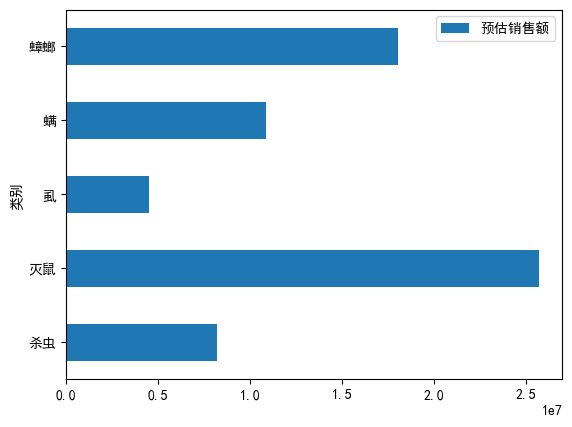

In [49]:
byclass.plot.barh()

array([<Axes: ylabel='预估销售额'>], dtype=object)

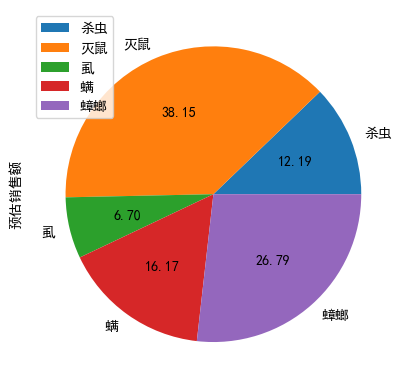

In [50]:
byclass.plot.pie(autopct='%.2f', subplots=True)

### Rodent Control Category Analysis

In [51]:
df24 = df23[df23['类别']== '灭鼠'].copy()
df24

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,产品名称,品牌,生产企业,型号,净含量,适用对象,物理形态
853,灭鼠,566054780243,9976,26.80,267356.8,11901.0,11596,广东 韶关,天猫,NaN,优璇福,NaN,MT007,NaN,老鼠,胶水
854,灭鼠,566054780243,9976,26.80,267356.8,NaN,11596,广东 深圳,天猫,NaN,优璇福,NaN,MT007,NaN,老鼠,胶水
855,灭鼠,572115448996,9945,9.90,98455.5,26442.0,3569,NaN,淘宝,NaN,创驰,NaN,21/32,NaN,老鼠,固体
856,灭鼠,39868408322,99,29.90,2960.1,20.0,352,河南 南阳,天猫,云杀 粘鼠板,云杀,NaN,粘鼠板,NaN,老鼠,固体
857,灭鼠,520282897220,99,39.90,3950.1,559.0,1250,NaN,淘宝,NaN,得硕,NaN,NaN,g,老鼠,固体
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,灭鼠,573118678210,0,22.00,NaN,3.0,0,NaN,淘宝,NaN,达豪,NaN,A1中外型,NaN,老鼠,NaN
2372,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,NaN,易捕,NaN,NaN,1kg,老鼠,固体
2373,灭鼠,520862079013,0,64.00,NaN,0.0,2,广东 广州,淘宝,NaN,九行,NaN,NaN,NaN,NaN,粉状
2374,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,NaN,易捕,NaN,NaN,1kg,老鼠,固体


In [52]:
df24['售价'].describe() 

count    1523.000000
mean       49.018910
std        69.762057
min         0.010000
25%        15.800000
50%        27.700000
75%        52.600000
max       498.000000
Name: 售价, dtype: float64

<Axes: ylabel='Frequency'>

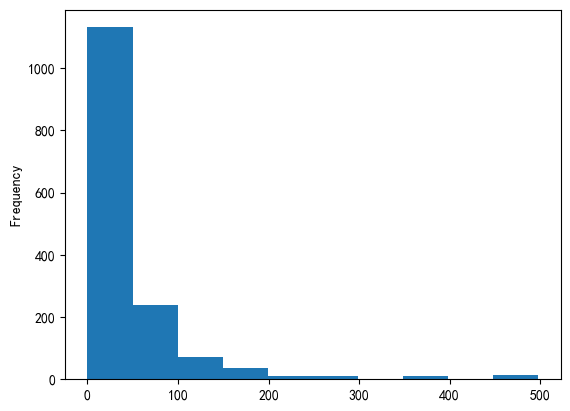

In [53]:
df24['售价'].plot.hist()

In [54]:
# custom binning: convert continuous sales to categorical variable
bins = [0,50,100,150,200,250,300,500] # bin boundaries
labels = ['0_50','50_100','100_150','150_200','200_250','250_300','300_500']# bin labels
#pd.cut    (0,50] ---> [0,50]
df24.loc[:, '价格区间'] = pd.cut(df24['售价'],bins,labels=labels,include_lowest=True)
df24['价格区间'].value_counts()

价格区间
0_50       1138
50_100      242
100_150      62
150_200      35
300_500      28
200_250       9
250_300       9
Name: count, dtype: int64

In [55]:
df24

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,产品名称,品牌,生产企业,型号,净含量,适用对象,物理形态,价格区间
853,灭鼠,566054780243,9976,26.80,267356.8,11901.0,11596,广东 韶关,天猫,NaN,优璇福,NaN,MT007,NaN,老鼠,胶水,0_50
854,灭鼠,566054780243,9976,26.80,267356.8,NaN,11596,广东 深圳,天猫,NaN,优璇福,NaN,MT007,NaN,老鼠,胶水,0_50
855,灭鼠,572115448996,9945,9.90,98455.5,26442.0,3569,NaN,淘宝,NaN,创驰,NaN,21/32,NaN,老鼠,固体,0_50
856,灭鼠,39868408322,99,29.90,2960.1,20.0,352,河南 南阳,天猫,云杀 粘鼠板,云杀,NaN,粘鼠板,NaN,老鼠,固体,0_50
857,灭鼠,520282897220,99,39.90,3950.1,559.0,1250,NaN,淘宝,NaN,得硕,NaN,NaN,g,老鼠,固体,0_50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,灭鼠,573118678210,0,22.00,NaN,3.0,0,NaN,淘宝,NaN,达豪,NaN,A1中外型,NaN,老鼠,NaN,0_50
2372,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,NaN,易捕,NaN,NaN,1kg,老鼠,固体,0_50
2373,灭鼠,520862079013,0,64.00,NaN,0.0,2,广东 广州,淘宝,NaN,九行,NaN,NaN,NaN,NaN,粉状,50_100
2374,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,NaN,易捕,NaN,NaN,1kg,老鼠,固体,0_50


- Calculate sales amount, sales share, item count, and item-count share for each price range

In [56]:
# grouping basis: price range
by = '价格区间'
df = df24
# aggregate by price range
df.groupby(by, observed=False).sum(numeric_only=True)

,销量（人数）,售价,预估销售额,评价人数,收藏人数
价格区间,,,,,
0_50,765446,24633.00,15162086.51,840615.0,1150300
50_100,46419,18895.85,3335060.19,362521.0,461409
100_150,20769,7838.95,2758086.29,48608.0,102286
150_200,3525,6440.00,629813.00,8413.0,19591
200_250,12556,2074.00,2743758.00,707.0,43652
250_300,808,2546.00,237740.00,682.0,7366
300_500,1683,12228.00,819468.00,5795.0,46655


In [57]:
# select estimated sales column
byc = pd.DataFrame(df.groupby(by, observed=False).sum(numeric_only=True).loc[:,['预估销售额']])

In [58]:
byc

,预估销售额
价格区间,
0_50,15162086.51
50_100,3335060.19
100_150,2758086.29
150_200,629813.00
200_250,2743758.00
250_300,237740.00
300_500,819468.00


In [59]:
# sales share, item count, item-count share, and avg sales per item
byc['销售额占比'] = byc['预估销售额'] / byc['预估销售额'].sum()
byc['宝贝数'] = df.groupby(by, observed=False)['宝贝ID'].nunique()
byc['宝贝数占比'] = byc['宝贝数'] / byc['宝贝数'].sum()
byc['单宝贝平均销售额'] =  byc['预估销售额']/byc['宝贝数']
byc

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额
价格区间,,,,,
0_50,15162086.51,0.590286,854,0.753086,17754.199660
50_100,3335060.19,0.129840,172,0.151675,19389.884826
100_150,2758086.29,0.107377,46,0.040564,59958.397609
150_200,629813.00,0.024520,28,0.024691,22493.321429
200_250,2743758.00,0.106819,7,0.006173,391965.428571
250_300,237740.00,0.009256,9,0.007937,26415.555556
300_500,819468.00,0.031903,18,0.015873,45526.000000


In [60]:
byc['相对竞争度'] = 1- (byc['单宝贝平均销售额']-byc['单宝贝平均销售额'].min())/(
                        byc['单宝贝平均销售额'].max()-byc['单宝贝平均销售额'].min())
byc

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
价格区间,,,,,,
0_50,15162086.51,0.590286,854,0.753086,17754.199660,1.000000
50_100,3335060.19,0.129840,172,0.151675,19389.884826,0.995629
100_150,2758086.29,0.107377,46,0.040564,59958.397609,0.887218
150_200,629813.00,0.024520,28,0.024691,22493.321429,0.987336
200_250,2743758.00,0.106819,7,0.006173,391965.428571,0.000000
250_300,237740.00,0.009256,9,0.007937,26415.555556,0.976854
300_500,819468.00,0.031903,18,0.015873,45526.000000,0.925786


In [61]:
# custom function
def byfun(df,by,sort='单宝贝平均销售额'):
    byc = pd.DataFrame(df.groupby(by, observed=False).sum(numeric_only=True).loc[:,['预估销售额']])
    # sales share, item count, item-count share, and avg sales per item
    byc['销售额占比'] = byc['预估销售额'] / byc['预估销售额'].sum()
    byc['宝贝数'] = df.groupby(by, observed=False)['宝贝ID'].nunique()
    byc['宝贝数占比'] = byc['宝贝数'] / byc['宝贝数'].sum()
    byc['单宝贝平均销售额'] =  byc['预估销售额']/byc['宝贝数']
    byc['相对竞争度'] = 1- (byc['单宝贝平均销售额']-byc['单宝贝平均销售额'].min())/(
                        byc['单宝贝平均销售额'].max()-byc['单宝贝平均销售额'].min())
    if sort:
        byc.sort_values(sort,ascending=False,inplace=True)
    return byc
byprices = byfun(df24,'价格区间')
byprices

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
价格区间,,,,,,
200_250,2743758.00,0.106819,7,0.006173,391965.428571,0.000000
100_150,2758086.29,0.107377,46,0.040564,59958.397609,0.887218
300_500,819468.00,0.031903,18,0.015873,45526.000000,0.925786
250_300,237740.00,0.009256,9,0.007937,26415.555556,0.976854
150_200,629813.00,0.024520,28,0.024691,22493.321429,0.987336
50_100,3335060.19,0.129840,172,0.151675,19389.884826,0.995629
0_50,15162086.51,0.590286,854,0.753086,17754.199660,1.000000


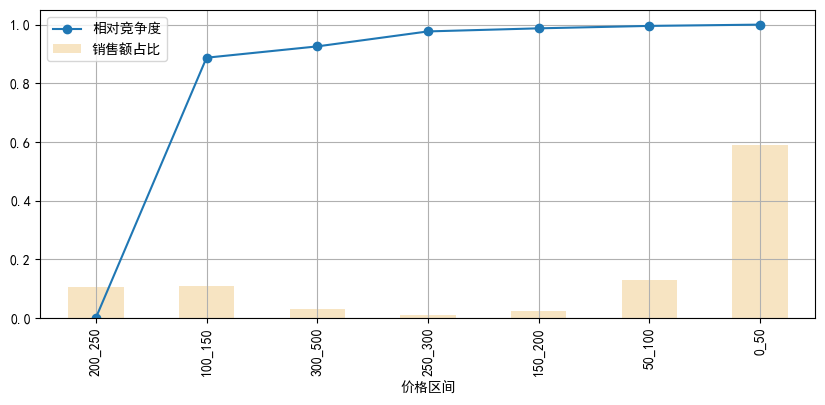

In [62]:
def mcplot(bydf,figsize=(10,4)):
    ax = bydf.plot(y='相对竞争度',linestyle='-',marker='o',figsize=figsize)
    bydf.plot(y='销售额占比',kind='bar',alpha=0.8,color='wheat',ax=ax)
    plt.grid(True)
    plt.show()
mcplot(byprices)

### 0_50 Segmented Price-Market Analysis

In [63]:
df25 = df24[df24['价格区间']=='0_50'].copy()

<Axes: ylabel='Frequency'>

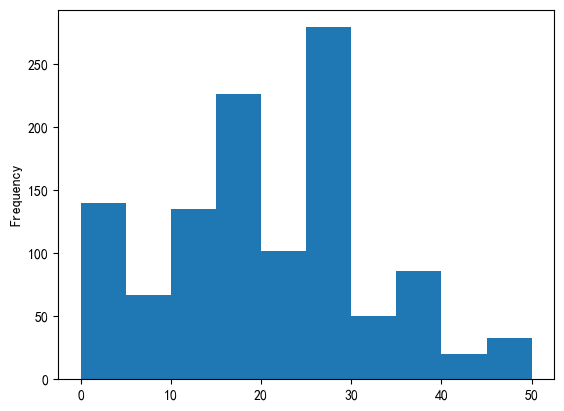

In [64]:
df25['售价'].plot.hist()

In [65]:
# custom binning: convert continuous sales to categorical variable
bins_01 = [0,10,20,30,40,50] # bin boundaries
labels_01 = ['0_10','10_20','20_30','30_40','40_25']# bin labels
#pd.cut    (0,50] ---> [0,50]
df25.loc[:, '价格子区间'] = pd.cut(df25['售价'],bins_01,labels=labels_01,include_lowest=True).astype(str)
df25.loc[:, '价格区间'] = df25['价格区间'].astype(str)
df25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138 entries, 853 to 2374
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   类别      1138 non-null   object  
 1   宝贝ID    1138 non-null   object  
 2   销量（人数）  1138 non-null   int64   
 3   售价      1138 non-null   float64 
 4   预估销售额   1130 non-null   float64 
 5   评价人数    1068 non-null   float64 
 6   收藏人数    1138 non-null   int64   
 7   地域      567 non-null    object  
 8   店铺类型    1138 non-null   object  
 9   产品名称    49 non-null     object  
 10  品牌      965 non-null    object  
 11  生产企业    0 non-null      object  
 12  型号      739 non-null    object  
 13  净含量     345 non-null    object  
 14  适用对象    1001 non-null   object  
 15  物理形态    908 non-null    object  
 16  价格区间    1138 non-null   category
 17  价格子区间   1138 non-null   object  
dtypes: category(1), float64(3), int64(2), object(12)
memory usage: 161.5+ KB


In [66]:
byprices_01 = byfun(df25,'价格子区间')
byprices_01

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
价格子区间,,,,,,
10_20,8102634.14,0.534401,272,0.318501,29789.096103,0.000000
20_30,4969620.92,0.327766,278,0.325527,17876.334245,0.411674
40_25,707568.49,0.046667,40,0.046838,17689.212250,0.418141
30_40,1240874.19,0.081841,98,0.114754,12661.981531,0.591869
0_10,141388.77,0.009325,166,0.194379,851.739578,1.000000


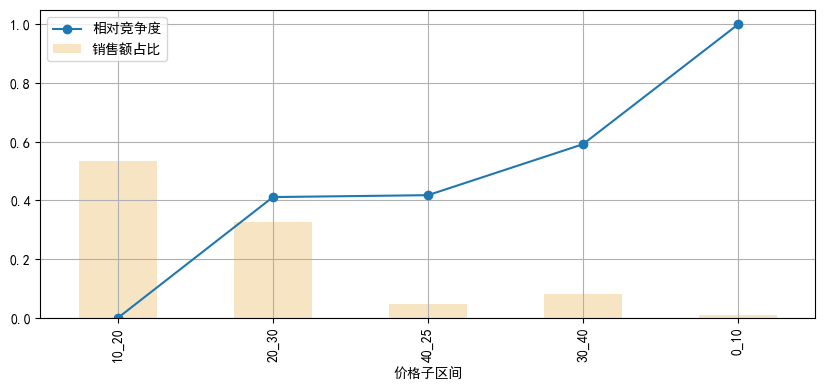

In [67]:
mcplot(byprices_01)

### Analysis of Other Attributes in the Segmented Market

In [68]:
bystore = byfun(df25,'店铺类型')
bystore

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
店铺类型,,,,,,
天猫,14019740.58,0.924658,220,0.257611,63726.093545,0.0
淘宝,1142345.93,0.075342,634,0.742389,1801.807461,1.0


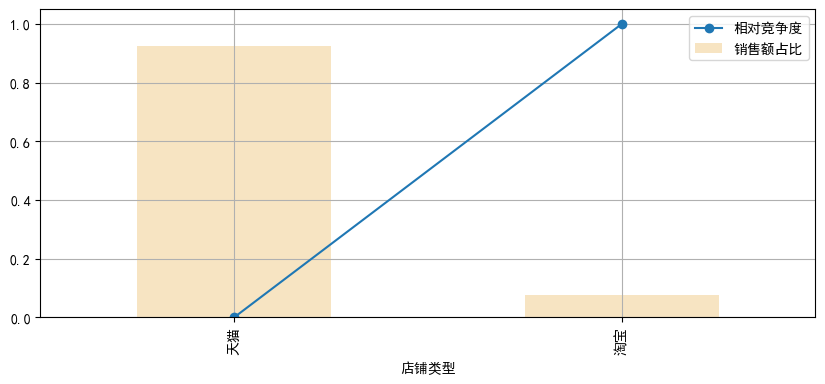

In [69]:
mcplot(bystore)

In [70]:
bytype = byfun(df25,'型号')
# top 5% models by estimated sales
bytype1 = bytype[bytype['预估销售额']>=bytype['预估销售额'].quantile(0.95)]
bytype1

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
型号,,,,,,
MT007,534713.60,0.035869,1,0.001805,534713.600000,0.000000
强力粘鼠魔毯,496974.60,0.033337,1,0.001805,496974.600000,0.070578
0005,927590.70,0.062223,2,0.003610,463795.350000,0.132628
拜灭士5g,420982.40,0.028240,1,0.001805,420982.400000,0.212696
CQL-1,391271.40,0.026247,1,0.001805,391271.400000,0.268260
希诺粘鼠板,362077.20,0.024288,1,0.001805,362077.200000,0.322858
祛螨包,320779.80,0.021518,1,0.001805,320779.800000,0.400090
粘鼠板老鼠贴,2051699.02,0.137629,7,0.012635,293099.860000,0.451856
A1009,265719.20,0.017825,1,0.001805,265719.200000,0.503063


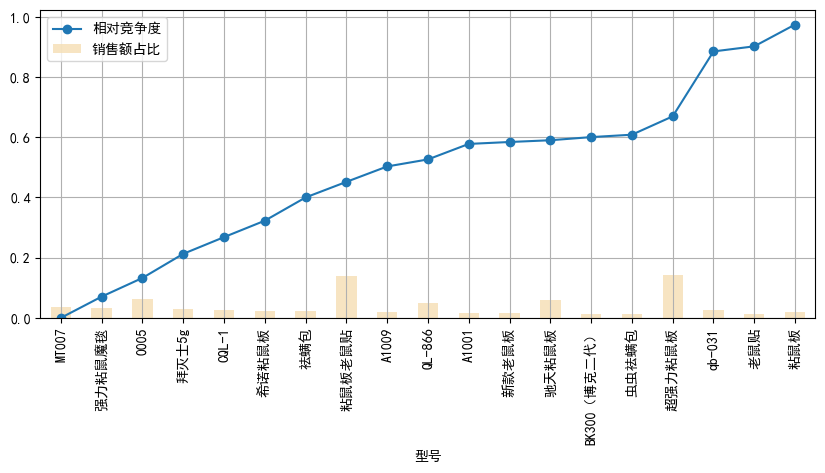

In [71]:
mcplot(bytype1)

In [72]:
byshape = byfun(df25,'物理形态')
byshape

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
物理形态,,,,,,
胶水,534713.60,0.040706,1,0.001490,534713.600000,0.000000
喷雾,275280.33,0.020956,6,0.008942,45880.055000,0.914433
粉状,322931.28,0.024584,9,0.013413,35881.253333,0.933137
固体,11381498.83,0.866443,583,0.868852,19522.296449,0.963738
液体,354235.50,0.026967,22,0.032787,16101.613636,0.970137
啫喱,256687.10,0.019541,38,0.056632,6754.923684,0.987622
5个1元硬币厚硬板,5226.00,0.000398,1,0.001490,5226.000000,0.990482
气体,1357.18,0.000103,1,0.001490,1357.180000,0.997719
油状,2341.60,0.000178,2,0.002981,1170.800000,0.998068


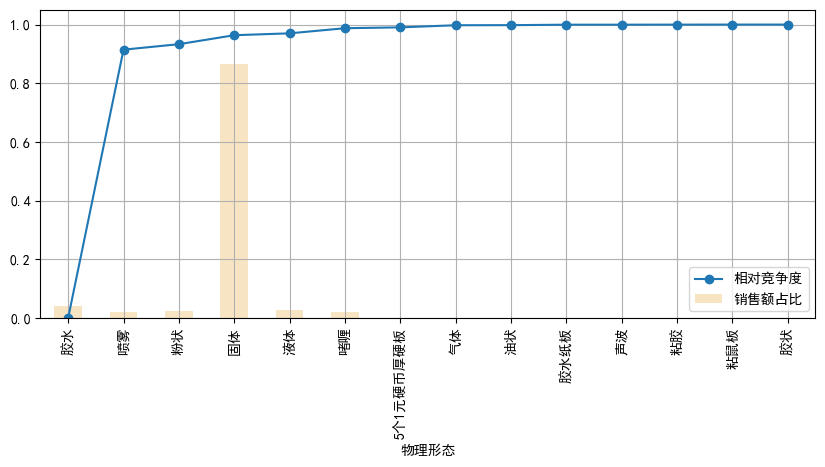

In [73]:
mcplot(byshape)

In [74]:
df25

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,产品名称,品牌,生产企业,型号,净含量,适用对象,物理形态,价格区间,价格子区间
853,灭鼠,566054780243,9976,26.80,267356.8,11901.0,11596,广东 韶关,天猫,NaN,优璇福,NaN,MT007,NaN,老鼠,胶水,0_50,20_30
854,灭鼠,566054780243,9976,26.80,267356.8,NaN,11596,广东 深圳,天猫,NaN,优璇福,NaN,MT007,NaN,老鼠,胶水,0_50,20_30
855,灭鼠,572115448996,9945,9.90,98455.5,26442.0,3569,NaN,淘宝,NaN,创驰,NaN,21/32,NaN,老鼠,固体,0_50,0_10
856,灭鼠,39868408322,99,29.90,2960.1,20.0,352,河南 南阳,天猫,云杀 粘鼠板,云杀,NaN,粘鼠板,NaN,老鼠,固体,0_50,20_30
857,灭鼠,520282897220,99,39.90,3950.1,559.0,1250,NaN,淘宝,NaN,得硕,NaN,NaN,g,老鼠,固体,0_50,30_40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,灭鼠,573793765449,0,17.16,NaN,6.0,0,北京,淘宝,NaN,NaN,NaN,NaN,NaN,老鼠,NaN,0_50,10_20
2367,灭鼠,36825350895,0,0.60,NaN,10.0,63,NaN,淘宝,NaN,剑牌,NaN,NaN,NaN,老鼠,固体,0_50,0_10
2371,灭鼠,573118678210,0,22.00,NaN,3.0,0,NaN,淘宝,NaN,达豪,NaN,A1中外型,NaN,老鼠,NaN,0_50,20_30
2372,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,NaN,易捕,NaN,NaN,1kg,老鼠,固体,0_50,30_40


## Category Distribution (Share)

In [75]:
filename2 = ['安速家居近30天销售数据.xlsx', '拜耳近30天销售数据.xlsx', '科凌虫控旗舰店近30天销售数据.xlsx']
filename2

['安速家居近30天销售数据.xlsx', '拜耳近30天销售数据.xlsx', '科凌虫控旗舰店近30天销售数据.xlsx']

In [76]:
df3 = pd.read_excel(os.path.join(cwd_path,"data","竞争数据","商品销售数据",filename2[2]) )
df3.head(1) 

,序号,店铺名称,商品名称,商品ID,主图链接,商品链接,商品原价,商品售价,30天销售量,总销量,类目,适用对象,30天销售额
0,1,科凌虫控旗舰店,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,541418255867,http://img.alicdn.com/bao/uploaded/i1/28323986...,https://detail.m.tmall.com/item.htm?id=5414182...,49.9,16.8,76608,3175991,灭鼠/杀虫剂,蟑螂,1287014.4


In [77]:
# remove unnecessary features
def load_xlsx_title(filename):
    file_path = os.path.join(cwd_path,"data","竞争数据","商品销售数据",filename)
    df = pd.read_excel(file_path)
    unless = ['序号','店铺名称','商品名称','主图链接','商品链接']
    df.drop(columns=unless,inplace=True)
    return df

In [78]:
df3bai = load_xlsx_title(filename2[1])
df3bai.head()

,商品ID,商品原价,商品售价,30天销售量,总销量,类目,物理形态,型号,净含量,使用对象,销售额
0,527604730327,109.0,39.9,43542,3023212,灭鼠/杀虫剂,啫喱,5g,5g,蟑螂,1737325.8
1,535731556857,199.0,59.9,4860,285440,灭鼠/杀虫剂,啫喱,拜灭易,12g,蚂蚁,291114.0
2,530229854741,199.0,89.9,838,70516,灭鼠/杀虫剂,液体,特密得100ml,100ml,白蚁,75336.2
3,569753894890,198.0,79.9,1487,19602,灭鼠/杀虫剂,啫喱,拜灭士5g-除敌,5g+5ml*4,蟑螂,118811.3
4,549862604116,109.0,39.9,1641,155203,灭鼠/杀虫剂,液体,除敌,20ml,杀虫剂,65475.9


In [79]:
df3an = load_xlsx_title(filename2[0])
df3an.head()

,商品ID,商品原价,商品售价,30天销售量,总销量,类目,适用对象,30天销售额
0,527032566392,60.0,54.4,2540,236321,灭鼠/杀虫剂,蟑螂,138176.0
1,534230487113,32.0,29.9,883,10498,灭鼠/杀虫剂,蟑螂,26401.7
2,527797679530,33.4,29.9,1073,117070,灭鼠/杀虫剂,蟑螂,32082.7
3,527113108079,48.0,45.5,471,55672,灭鼠/杀虫剂,蟑螂,21430.5
4,531350777813,58.0,48.0,566,19705,灭鼠/杀虫剂,蟑螂,27168.0


In [80]:
df3kl = load_xlsx_title(filename2[2])
df3kl.head()

,商品ID,商品原价,商品售价,30天销售量,总销量,类目,适用对象,30天销售额
0,541418255867,49.9,16.8,76608,3175991,灭鼠/杀虫剂,蟑螂,1287014.4
1,528722144927,39.0,19.8,5852,174989,灭鼠/杀虫剂,蟑螂,115869.6
2,545526161662,49.9,39.0,2497,74352,灭鼠/杀虫剂,蟑螂,97383.0
3,536261470312,49.0,29.8,540,76572,灭鼠/杀虫剂,蛾,16092.0
4,553350699341,48.9,13.8,6408,324171,灭鼠/杀虫剂,鼠,88430.4


### Categories

In [81]:
bai31 = df3bai.groupby('类目', observed=False).sum(numeric_only=True)
bai31

,商品ID,商品原价,商品售价,30天销售量,总销量,销售额
类目,,,,,,
灭鼠/杀虫剂,8286108792066,2623.0,1195.0,59185,3720411,2673315.2


In [82]:
an31 = df3an.groupby('类目', observed=False).sum(numeric_only=True)
an31

,商品ID,商品原价,商品售价,30天销售量,总销量,30天销售额
类目,,,,,,
漱口水,1130081741597,208.0,149.8,127,2710,9137.3
灭鼠/杀虫剂,15853551883006,1650.3,1196.7,11082,564638,494539.3
空气芳香剂,1620098374783,196.8,141.9,118,7065,4668.6
空调清洁剂,1056404562798,122.9,113.0,151,32939,10420.9
蚊香液,3878968356851,565.0,344.6,573,42000,24343.6
蚊香片,1129949034942,157.0,81.0,1,230,45.0


In [83]:
kl31 = df3kl.groupby('类目', observed=False).sum(numeric_only=True)
kl31

,商品ID,商品原价,商品售价,30天销售量,总销量,30天销售额
类目,,,,,,
其它园艺用品,552695315776,39.9,26.0,880,41667,22880.0
灭鼠/杀虫剂,13109439326249,1728.4,817.2,163833,4416228,3734597.0
灭鼠笼/捕鼠器,1112465425997,88.9,42.7,2315,46760,62293.0


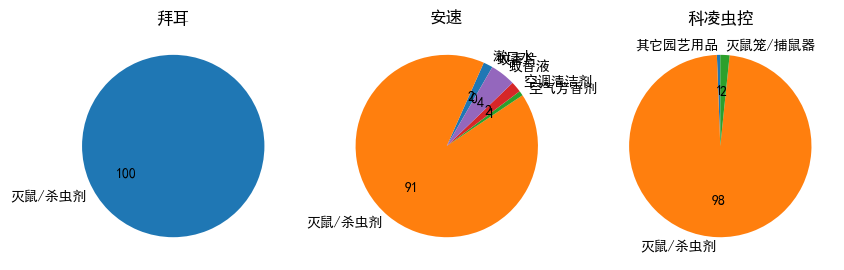

In [84]:
# pie charts [0,1,2]
fig,axes = plt.subplots(1,3,figsize=(10,6)) 
ax = axes[0] # first: Bayer
bai31['销售额'].plot.pie(autopct='%.f',title='拜耳',startangle=30,ax=ax)
ax.set_ylabel('')
ax = axes[1] # second: Ansu
an31['30天销售额'].plot.pie(autopct='%.f',title='安速',startangle=60,ax=ax)
ax.set_ylabel('')
ax = axes[2] # third: Keling Pest Control
kl31['30天销售额'].plot.pie(autopct='%.f',title='科凌虫控',startangle=90,ax=ax)
ax.set_ylabel('')
plt.show()

### Target Users

In [85]:
bai32 = df3bai.groupby('使用对象', observed=False).sum(numeric_only=True)
bai32

,商品ID,商品原价,商品售价,30天销售量,总销量,销售额
使用对象,,,,,,
上门服务,578090143145,199.0,99.0,74,308,7326.0
杀虫剂,1074833731154,208.0,79.8,2593,187382,103460.7
白蚁,530229854741,199.0,89.9,838,70516,75336.2
蚂蚁,1106313745903,448.0,173.9,4989,286942,305820.0
蟑螂,4996641317123,1569.0,752.4,50691,3175263,2181372.3


In [86]:
an32 = df3an.groupby('适用对象', observed=False).sum(numeric_only=True)
an32

,商品ID,商品原价,商品售价,30天销售量,总销量,30天销售额
适用对象,,,,,,
杀虫剂,4366320607112,435.7,349.6,755,19416,34687.5
漱口水,1130081741597,208.0,149.8,127,2710,9137.3
空气芳香剂,1620098374783,196.8,141.9,118,7065,4668.6
空调清洁剂,1056404562798,122.9,113.0,151,32939,10420.9
蚂蚁,563628133715,29.0,22.2,53,833,1176.6
蚊,5008917391793,722.0,425.6,574,42230,24388.6
蝇,564993565252,48.0,24.8,515,16551,12772.0
螨,2820972369214,399.0,242.6,3302,19587,164381.3
蟑螂,6446879299188,654.0,481.3,6178,500064,268585.3


In [87]:
kl32 = df3kl.groupby('适用对象', observed=False).sum(numeric_only=True)
kl32

,商品ID,商品原价,商品售价,30天销售量,总销量,30天销售额
适用对象,,,,,,
其它园艺用品,552695315776,39.9,26.0,880,41667,22880.0
虫,1606589035658,247.6,118.6,37,6596,2035.0
虱,559335827678,65.0,25.1,7395,80838,185614.5
蛾,1074897437670,77.0,44.3,575,78354,16599.5
螨,1143807512213,198.0,78.8,36037,145055,1114222.4
蟑螂,2193692130180,237.8,105.5,85785,3427031,1525024.2
鼠,7643582808847,991.9,487.6,36319,725114,953394.4


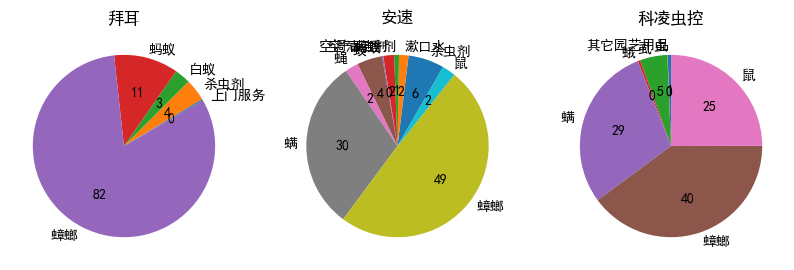

In [88]:
# pie charts [0,1,2]
fig,axes = plt.subplots(1,3,figsize=(10,6)) 
ax = axes[0] # first: Bayer
bai32['销售额'].plot.pie(autopct='%.f',title='拜耳',startangle=30,ax=ax)
ax.set_ylabel('')
ax = axes[1] # second: Ansu
an32['30天销售额'].plot.pie(autopct='%.f',title='安速',startangle=60,ax=ax)
ax.set_ylabel('')
ax = axes[2] # third: Keling Pest Control
kl32['30天销售额'].plot.pie(autopct='%.f',title='科凌虫控',startangle=90,ax=ax)
ax.set_ylabel('')
plt.show()

## Product Portfolio Analysis

In [89]:
filename3 = ['安速全店商品交易数据.xlsx', '拜耳全店商品交易数据.xlsx', '科凌虫控全店商品交易数据.xlsx']
filename3

['安速全店商品交易数据.xlsx', '拜耳全店商品交易数据.xlsx', '科凌虫控全店商品交易数据.xlsx']

### Bayer

In [90]:
df4bai = pd.read_excel(os.path.join(cwd_path,"data","竞争数据","商品交易数据",filename3[1]))
df4bai.head()

,品牌,时间,商品,行业排名,交易指数,交易增长幅度,支付转化指数,操作,交易金额
0,拜耳,2018-07-01,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,1,583483,0.0350,1500,趋势分析,9354158.37
1,拜耳,2018-07-01,进口蟑螂药一窝端德国拜耳拜灭士强力杀蟑胶饵蟑螂屋克星家用全窝,6,278542,0.1258,1194,趋势分析,2470202.91
2,拜耳,2018-07-01,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,11,212329,0.5070,1328,趋势分析,1518114.06
3,拜耳,2018-07-01,进口蟑螂药德国拜耳拜灭士灭杀蟑胶饵剂粉屋克星全窝端12g家用,44,107697,-0.2044,1117,趋势分析,451897.06
4,拜耳,2018-07-01,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,45,105901,-0.2134,936,趋势分析,438583.74


In [91]:
df4bai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   品牌      142 non-null    object        
 1   时间      142 non-null    datetime64[ns]
 2   商品      142 non-null    object        
 3   行业排名    142 non-null    int64         
 4   交易指数    142 non-null    int64         
 5   交易增长幅度  142 non-null    float64       
 6   支付转化指数  142 non-null    int64         
 7   操作      142 non-null    object        
 8   交易金额    142 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 10.1+ KB


- The dataset covers 5 months. Each product appears in at most 5 months and at least 1 month, so products need grouped summarization

In [92]:
df4bai['商品'].value_counts().count()

np.int64(44)

In [93]:
df4bai

,品牌,时间,商品,行业排名,交易指数,交易增长幅度,支付转化指数,操作,交易金额
0,拜耳,2018-07-01,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,1,583483,0.0350,1500,趋势分析,9354158.37
1,拜耳,2018-07-01,进口蟑螂药一窝端德国拜耳拜灭士强力杀蟑胶饵蟑螂屋克星家用全窝,6,278542,0.1258,1194,趋势分析,2470202.91
2,拜耳,2018-07-01,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,11,212329,0.5070,1328,趋势分析,1518114.06
3,拜耳,2018-07-01,进口蟑螂药德国拜耳拜灭士灭杀蟑胶饵剂粉屋克星全窝端12g家用,44,107697,-0.2044,1117,趋势分析,451897.06
4,拜耳,2018-07-01,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,45,105901,-0.2134,936,趋势分析,438583.74
...,...,...,...,...,...,...,...,...,...
137,拜耳,2018-11-01,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,357,22585,2.4393,266,趋势分析,28969.28
138,拜耳,2018-11-01,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,385,21568,1.2793,751,趋势分析,26742.75
139,拜耳,2018-11-01,德国进口拜耳蟑螂药拜灭士杀蟑胶饵5g两盒套装全窝端杀灭蟑螂剂屋,418,20221,-0.3242,679,趋势分析,23913.53
140,拜耳,2018-11-01,拜耳灭蚂蚁药家用一窝端室内室外用杀小黄红蚂蚁药神器胶饵拜灭易,437,19549,7.4427,1612,趋势分析,22553.62


In [94]:
# custom grouped summarization function
def byproduct(df):
    dfb = df.groupby(by=['商品'],as_index=False, observed=False).agg(
        交易增长幅度=('交易增长幅度','mean'),
        交易金额=('交易金额','sum'),
        商品个数=('商品','count')
    )
    dfb['交易金额占比'] = dfb['交易金额']/dfb['交易金额'].sum()
    return dfb

In [95]:
bai4 = byproduct(df4bai)
bai4.head()

,商品,交易增长幅度,交易金额,商品个数,交易金额占比
0,17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55,1,0.000523
1,德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17,3,0.002439
2,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59,5,0.017232
3,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,1,0.000330
4,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,1,0.000358


In [96]:
bai4.describe(percentiles=[0.1,0.9,0.99])

,交易增长幅度,交易金额,商品个数,交易金额占比
count,44.000000,4.400000e+01,44.000000,44.000000
mean,25.539933,1.839560e+06,3.227273,0.022727
std,155.083825,6.321050e+06,1.668639,0.078095
min,-0.292100,2.255362e+04,1.000000,0.000279
10%,-0.132240,3.262692e+04,1.000000,0.000403
50%,0.109000,2.061879e+05,3.000000,0.002547
90%,6.717030,2.579050e+06,5.000000,0.031863
99%,600.523955,2.871464e+07,5.000000,0.354762
max,1030.000000,4.010385e+07,5.000000,0.495473


In [97]:
def block(x):
    qu = x.quantile(.9)
    out = x.mask(x>qu,qu) # replace values above the 90th percentile
    return(out)

In [98]:
def block2(df):
    df1 = df.copy()
    df1['交易增长幅度'] = block(df1['交易增长幅度']) # winsorize transaction growth
    df1['交易金额占比'] = block(df1['交易金额占比']) # winsorize transaction growth
    return df1

In [99]:
bai41 = block2(bai4)
bai41.describe(percentiles=[0.1,0.9,0.99])

,交易增长幅度,交易金额,商品个数,交易金额占比
count,44.000000,4.400000e+01,44.000000,44.000000
mean,1.171668,1.839560e+06,3.227273,0.007699
std,2.212537,6.321050e+06,1.668639,0.010333
min,-0.292100,2.255362e+04,1.000000,0.000279
10%,-0.132240,3.262692e+04,1.000000,0.000403
50%,0.109000,2.061879e+05,3.000000,0.002547
90%,6.209061,2.579050e+06,5.000000,0.028423
99%,6.717030,2.871464e+07,5.000000,0.031863
max,6.717030,4.010385e+07,5.000000,0.031863


In [100]:
# define Boston-matrix plotting function; use mean/median or custom quantiles (0.33, 0.33) as split lines
# mean=True: split by mean
# mean=False: split by quantiles/median
def plotBOG(df,mean = False,q1=0.5,q2=0.5):
    f,ax = plt.subplots(figsize=(10,8))
    # set point colors
    color = df['商品个数']
    # set point size range
    size_min, size_max = 20, 200
    size_range = df['商品个数'].max() - df['商品个数'].min()
    sizes = size_min + ((df['商品个数'] - df['商品个数'].min()) / size_range) * (size_max - size_min)
    # draw scatter plot
    scatter = ax.scatter(x=df['交易金额占比'],y=df['交易增长幅度'],s=sizes,c=color,cmap='cool')
    # add color legend
    legend = ax.legend(*scatter.legend_elements(), title='商品个数')
    # annotate each point with row index (product) for exploration
    for i in range(0,len(df)):
        ax.text(df['交易金额占比'][i]+0.001,df['交易增长幅度'][i],i) # shift index labels slightly right on x-axis
    if mean:
        plt.axvline(df['交易金额占比'].mean())# vertical line
        plt.axhline(df['交易增长幅度'].mean())# horizontal line
    else:
        plt.axvline(df['交易金额占比'].quantile(q1))# vertical line
        plt.axhline(df['交易增长幅度'].quantile(q2))# horizontal line
    plt.show()



In [101]:
bai41

,商品,交易增长幅度,交易金额,商品个数,交易金额占比
0,17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55,1,0.000523
1,德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17,3,0.002439
2,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59,5,0.017232
3,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,1,0.000330
4,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,1,0.000358
5,德国拜耳拜灭士5g+拜灭易12g进口杀蟑螂蚂蚁药蟑螂克星家用全窝端,0.048340,251225.58,5,0.003104
6,德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,1.311740,1484952.41,5,0.018346
7,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,-0.121360,40103850.97,5,0.031863
8,德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,6.717030,236386.32,1,0.002920
9,德国拜耳拜灭易12g+除敌5ml*4支 进口蚂蚁药全窝端家用杀虫剂组合,0.450550,89566.01,2,0.001107


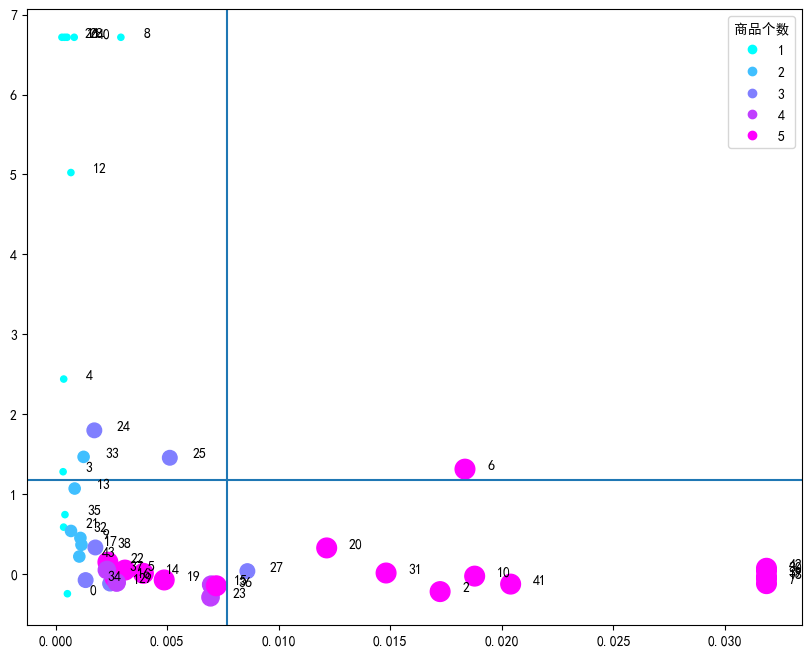

In [102]:
plotBOG(bai41,mean=True)

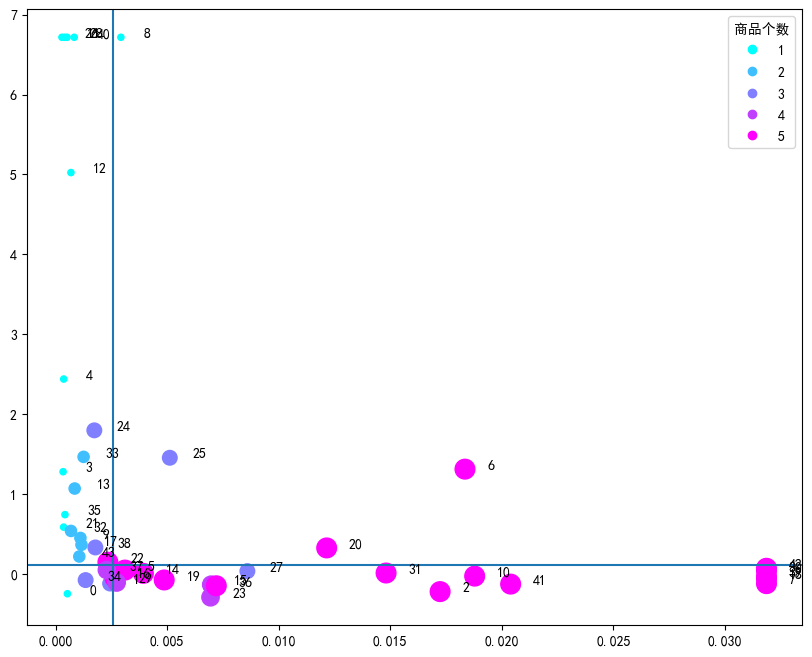

In [103]:
plotBOG(bai41,mean=False)

- Review products by portfolio quadrant (star, hot-selling, problem, and dog/abandon)
- Use the raw values instead of winsorized values

In [104]:
def extractBOG(df,q1=0.5,q2=0.5,by='交易金额占比'):
    # star products
    star = df.loc[(df['交易金额占比'] >= df['交易金额占比'].quantile(q1))# transaction amount share >= 0.5
          & (df['交易增长幅度'] >= df['交易增长幅度'].quantile(q2)),:] # growth >= 0.5
    star = star.sort_values(by,ascending=False)
    # cash-cow products
    cow = df.loc[(df['交易金额占比'] >= df['交易金额占比'].quantile(q1))# transaction amount share >= 0.5
          & (df['交易增长幅度'] < df['交易增长幅度'].quantile(q2)),:] # growth < 0.5
    cow = cow.sort_values(by,ascending=False)
    # question-mark products
    que = df.loc[(df['交易金额占比'] < df['交易金额占比'].quantile(q1))# transaction amount share < 0.5
          & (df['交易增长幅度'] >= df['交易增长幅度'].quantile(q2)),:] # growth >= 0.5
    que = que.sort_values(by,ascending=False)
    
    return star,cow,que

In [105]:
bai4star,bai4cow,bai4que = extractBOG(bai4)

In [106]:
bai4star

,商品,交易增长幅度,交易金额,商品个数,交易金额占比
6,德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,1.311740,1484952.41,5,0.018346
20,德国拜耳除敌杀虫剂灭蟑螂药跳蚤苍蝇臭虫除螨虱子喷雾5ml*8,0.325580,983199.69,5,0.012147
25,拜耳拜灭士 蟑螂药家用全窝端 强力灭除厨房蟑螂屋克星杀德国进口,1.454067,413902.42,3,0.005114
8,德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,29.260600,236386.32,1,0.002920


In [107]:
bai4cow

,商品,交易增长幅度,交易金额,商品个数,交易金额占比
7,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,-0.121360,40103850.97,5,0.495473
39,进口蟑螂药一窝端德国拜耳拜灭士强力杀蟑胶饵蟑螂屋克星家用全窝,-0.034680,13617307.87,5,0.168238
18,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,-0.056240,6130488.42,5,0.075741
42,进口蟑螂药德国拜耳拜灭士灭杀蟑胶饵剂粉屋克星全窝端12g家用,0.070960,3589799.54,5,0.044351
30,蟑螂药一窝端德国拜耳拜灭士除蟑灭杀蟑螂克星全窝端家用杀蟑胶,0.038900,2976922.63,5,0.036779
41,进口蟑螂药德国拜耳拜灭士杀蟑胶饵蟑螂克星全窝端家用灭蟑屋12g,-0.127140,1650681.34,5,0.020394
10,德国拜耳拜灭易灭蚁饵剂粉除杀防蚂蚁药杀虫剂全窝端家用室内花园,-0.027300,1520126.15,5,0.018781
2,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59,5,0.017232
31,蟑螂药德国拜耳拜灭士强力除杀蟑螂克星胶饵屋家用捕捉器贴全窝端,0.011680,1198694.67,5,0.014810
27,拜耳蟑螂药一窝端家用拜灭士杀蟑胶饵德国小强药粉灭蟑螂厨房克星,0.035400,695372.27,3,0.008591


In [108]:
bai4que

,商品,交易增长幅度,交易金额,商品个数,交易金额占比
22,德国进口拜耳蟑螂药拜灭士杀蟑胶饵5g两盒套装全窝端杀灭蟑螂剂屋,0.147040,189376.20,5,0.002340
38,进口蟑螂药 德国拜耳拜灭士杀蟑螂胶饵剂33克灭蟑螂药全窝端家用,0.331367,143883.32,3,0.001778
24,拜灭士蟑螂药蟑螂克星家用无毒强力灭蟑清德国拜耳杀蟑饵剂全窝端,1.797267,140032.47,3,0.001730
33,蟑螂药进口德国拜耳拜灭士家用除杀蟑螂屋胶饵捕捉器强力清全窝端,1.465350,101079.33,2,0.001249
17,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁无毒家用室内全窝端,0.364950,93400.98,2,0.001154
9,德国拜耳拜灭易12g+除敌5ml*4支 进口蚂蚁药全窝端家用杀虫剂组合,0.450550,89566.01,2,0.001107
43,预售德国拜耳进口蟑螂药进口蚂蚁药组合装5g+12g,0.218150,85546.09,2,0.001057
13,德国拜耳蟑螂药拜灭士杀蟑胶饵蟑螂克星全窝端家用灭蟑加量装12g,1.069050,68699.06,2,0.000849
40,进口蟑螂药一窝端德国拜耳拜灭士杀蟑胶饵诱防蟑螂屋全窝端5+12g,31.218500,67043.14,1,0.000828
32,蟑螂药拜耳拜灭士杀蟑胶饵强力灭蟑清贴捕捉器蟑螂克星家用全窝端,0.538100,55395.16,2,0.000684


In [109]:
bai4que.sort_values(by=["交易增长幅度"],ascending=False)

,商品,交易增长幅度,交易金额,商品个数,交易金额占比
28,电子猫超声波驱鼠器家用大功率灭鼠防鼠赶老鼠夹药捕鼠干扰粘鼠板,1030.000000,41046.03,1,0.000507
40,进口蟑螂药一窝端德国拜耳拜灭士杀蟑胶饵诱防蟑螂屋全窝端5+12g,31.218500,67043.14,1,0.000828
11,德国拜耳拜灭易进口蚂蚁药一窝端灭蚁饵剂清除蚂蚁粉家用全窝端,7.867000,32246.39,1,0.000398
26,拜耳灭蚂蚁药家用一窝端室内室外用杀小黄红蚂蚁药神器胶饵拜灭易,7.442700,22553.62,1,0.000279
12,德国拜耳白蚁药杀虫剂全窝端家用除杀防治灭飞蚂蚁特密得预防装修,5.023800,55113.41,1,0.000681
4,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,1,0.000358
24,拜灭士蟑螂药蟑螂克星家用无毒强力灭蟑清德国拜耳杀蟑饵剂全窝端,1.797267,140032.47,3,0.001730
33,蟑螂药进口德国拜耳拜灭士家用除杀蟑螂屋胶饵捕捉器强力清全窝端,1.465350,101079.33,2,0.001249
3,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,1,0.000330
13,德国拜耳蟑螂药拜灭士杀蟑胶饵蟑螂克星全窝端家用灭蟑加量装12g,1.069050,68699.06,2,0.000849


## Traffic Structure Analysis

In [110]:
filename4 = ['安速家居旗舰店流量渠道.xlsx', '拜耳官方旗舰店流量渠道.xlsx', '科凌虫控旗舰店流量渠道.xlsx']
filename4

['安速家居旗舰店流量渠道.xlsx', '拜耳官方旗舰店流量渠道.xlsx', '科凌虫控旗舰店流量渠道.xlsx']

In [111]:
df5bai = pd.read_excel(os.path.join(cwd_path,"data","竞争数据","流量渠道数据",filename4[1])) 

In [112]:
df5bai.head(10)

,流量来源,交易指数,交易指数.1
0,淘内免费,399466,320128
1,手淘搜索,336457,274916
2,淘内免费其他,195308,153255
3,手淘问大家,123512,108108
4,手淘旺信,88024,59198
5,猫客搜索,86179,51920
6,手淘其他店铺商品详情,73179,50018
7,手淘我的评价,57423,46987
8,手淘首页,51703,34823
9,手淘消息中心,40270,29190


In [113]:
# keep only top-10 traffic sources by transaction index
df0 = df5bai.copy()
top10 = df0.sort_values('交易指数',ascending=False).reset_index(drop=True).iloc[:10,:]
# calculate transaction-index share
top10['交易指数占比'] = top10['交易指数']/top10['交易指数'].sum()
top10.set_index('流量来源',inplace=True)
top10

,交易指数,交易指数.1,交易指数占比
流量来源,,,
淘内免费,399466,320128,0.171147
手淘搜索,336457,274916,0.144152
自主访问,312587,234293,0.133925
购物车,251600,186323,0.107795
付费流量,223315,206480,0.095677
我的淘宝,205162,151825,0.087900
淘内免费其他,195308,153255,0.083678
直通车,187952,147463,0.080526
手淘问大家,123512,108108,0.052917


In [114]:
# mark paid channels
paid = ['付费流量','直通车','淘宝客']
ind = np.any([top10.index == i for i in paid],axis=0) # True means paid channel
ind

array([False, False, False, False,  True, False, False,  True, False,
        True])

In [115]:
# custom function: traffic-structure summary
def flow(df):
    # keep only top-10 traffic sources by transaction index
    df0 = df.copy()
    top10 = df0.sort_values('交易指数',ascending=False).reset_index(drop=True).iloc[:10,:]
    # calculate transaction-index share
    top10['交易指数占比'] = top10['交易指数']/top10['交易指数'].sum()
    top10.set_index('流量来源',inplace=True)
    # mark paid channels
    paid = ['付费流量','直通车','淘宝客']
    ind = np.any([top10.index == i for i in paid],axis=0) # True means paid channel
    explode = ind * 0.1 # explode slices outward by 0.1
    
    ax = top10['交易指数占比'].plot.pie(autopct='%.1f%%',
                            figsize=(8,8),colormap='cool',explode = explode)
    
    ax.set_ylabel('')
    plt.show()
    
    # output metrics: total transaction index, paid-traffic share, and paid-traffic transaction index
    salesum = top10['交易指数'].sum() # total transaction index
    paidsum = top10['交易指数占比'][ind].sum() # paid-traffic share
    paidsale = salesum * paidsum # transaction index contributed by paid traffic
    print(f'前十流量中:总交易指数:{salesum:.0f};付费流量占比:{paidsum*100:.2f}%;付费流量带来的交易指数:{paidsale:.0f}')
    
    return top10

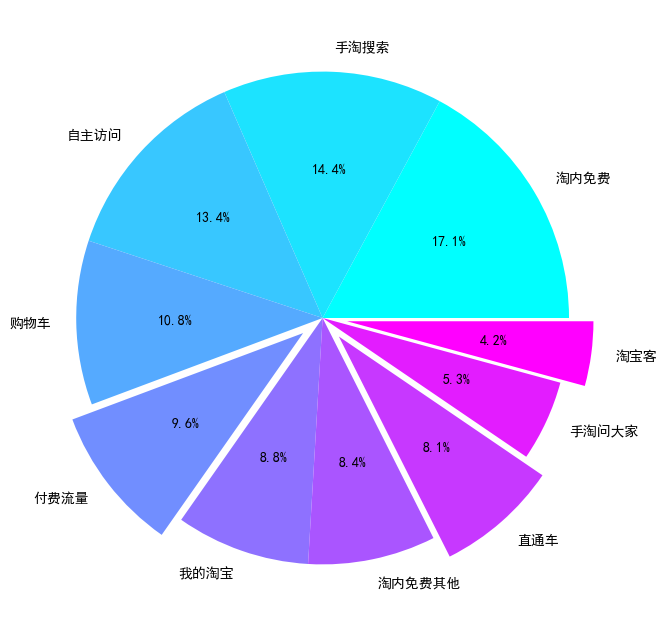

前十流量中:总交易指数:2334051;付费流量占比:21.85%;付费流量带来的交易指数:509959


In [116]:
bai5 = flow(df5bai)

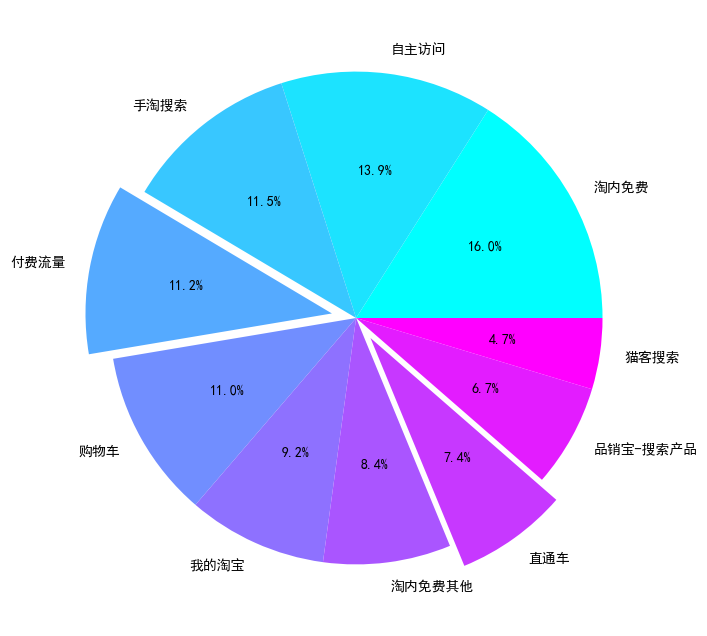

前十流量中:总交易指数:748539;付费流量占比:18.58%;付费流量带来的交易指数:139048


In [117]:
df5an= pd.read_excel(os.path.join(cwd_path,"data","竞争数据","流量渠道数据",filename4[0]))
an5 = flow(df5an)

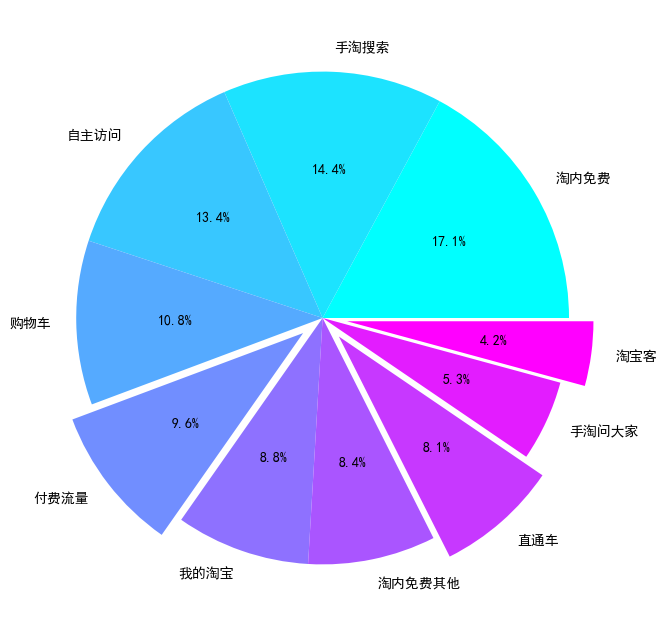

前十流量中:总交易指数:2334051;付费流量占比:21.85%;付费流量带来的交易指数:509959


In [118]:
df5ke = pd.read_excel(os.path.join(cwd_path,"data","竞争数据","流量渠道数据",filename4[1])) 
ke5 = flow(df5ke)

# Sentiment Analysis

In [119]:
filename=['安速.xlsx', '德国拜耳.xlsx', '科林虫控.xlsx']
filename

['安速.xlsx', '德国拜耳.xlsx', '科林虫控.xlsx']

In [120]:
df6bai = pd.read_excel(os.path.join(cwd_path,"data","竞争数据","评论舆情数据",filename[1]))

In [121]:
df6bai.head()

,产品名称,链接,评论页码,评论,评论日期
0,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一...,2018-11-21 19:01:20
1,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,朋友推荐的说之前用的挺管用的。在放药的前几天就没怎么见蟑螂了，然后出去玩之前把家里角角落落全...,2018-11-23 11:07:03
2,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,真心坑人啊！😂还没到24小时就凝固了！小强依然活跃🤑🤑🤑🤑,2018-11-24 00:28:17
3,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,盆友推荐的，说特别好用，效果杠杠的，看双十一做活动，就买啦，效果应该不错吧，不过尸体都是家里...,2018-11-25 03:07:25
4,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,我是买到假货吗？那么贵的蟑螂药居然还有，还是蟑螂已经百毒不侵了？,2018-11-26 07:49:43


In [122]:
bai6 = list(df6bai['评论'])
bai6[0]

'刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一定要管用，一定要管用，准备看下后续效果会继续追加评价。不知道多久才能消灭干净，还在厨房，没法做饭了，都不愿意进去了。有点担心会挥发。看很多人在用也就试试吧。哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎'

- Remove stop words (Baidu stop-word list)

In [123]:
jieba.lcut('真心坑人啊 还没到 小时就凝固了 小强依然活跃')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/h7/3r9693p510j95qwzvt40d_4h0000gn/T/jieba.cache
Loading model cost 1.210 seconds.
Prefix dict has been built successfully.


['真心',
 '坑人',
 '啊',
 ' ',
 '还',
 '没到',
 ' ',
 '小时',
 '就',
 '凝固',
 '了',
 ' ',
 '小强',
 '依然',
 '活跃']

In [124]:
stopwords = list(pd.read_csv(os.path.join(cwd_path,"data","百度停用词表.txt"),
                             names=['stopwords'])['stopwords']) # convert specified column to list
stopwords.extend([' ']) # remove spaces as stop words too

In [125]:
stopwords[0:10] # stop-word list

['--', '?', '“', '”', '》', '－－', 'able', 'about', 'above', 'according']

- Data cleaning: remove non-Chinese/non-English characters; remove commas and periods before tokenization

In [126]:
import re # regular expression
bai61 = [re.sub(r'[^a-z\u4E00-\u9Fa5]+',' ',i,
                flags=re.I) for i in bai6]# Chinese character range \u4E00-\u9Fa5; flags=re.I for case-insensitive matching

- Tokenize and combine words

In [127]:
bai62 = []
for i in bai61:
    # analyze each review
    seg1 = pd.Series(jieba.lcut(i))
    ind1 = pd.Series([len(j) for j in seg1])>1 # keep tokens with length > 1
    seg2 = seg1[ind1]
    # remove stop words using isin
    ind2 = ~seg2.isin(pd.Series(stopwords))
    seg3 = list(seg2[ind2].unique())# deduplicate
    if len(seg3)>0:
        bai62.append(seg3)

In [128]:
bai62[0]  # result is a nested list

['收到',
 '家里',
 '厨房',
 '小强',
 '评价',
 '销量',
 '赶紧',
 '三盒',
 '管用',
 '后续',
 '效果',
 '追加',
 '多久',
 '才能',
 '消灭',
 '干净',
 '没法',
 '做饭',
 '进去',
 '担心',
 '挥发',
 '很多',
 '试试']

In [129]:
# combine multiple lists into one
bai63 = [y for x in bai62 for y in x]

In [130]:
# word-frequency statistics
baifreq = pd.Series(bai63).value_counts()

In [131]:
baifreq[:10]

效果    541
蟑螂    409
双十    145
不错    144
评论    138
小强    114
收到    106
用户    100
填写    100
东西     95
Name: count, dtype: int64

- Build data needed for word cloud generation: one large string of space-separated terms

In [132]:
bai64 = ' '.join(bai63)

- Generate a word cloud

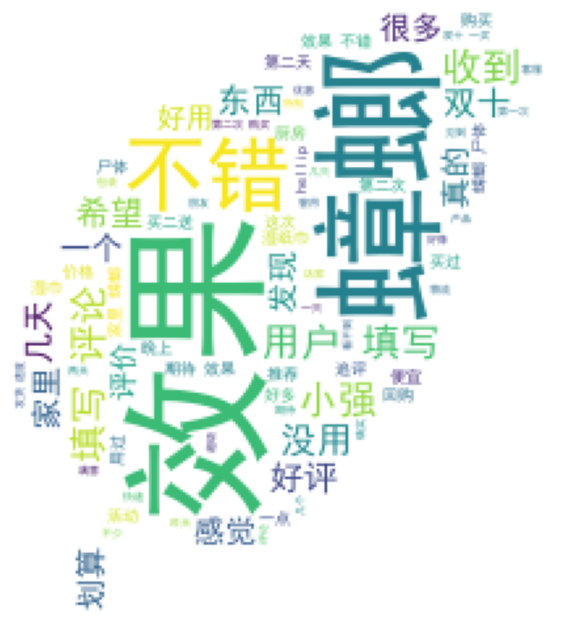

In [133]:
# read image
mask = imageio.v2.imread(os.path.join(cwd_path,"data","leaf.jpg"))
# font setting for Chinese word cloud
font = os.path.join(cwd_path,"data","SimHei.ttf")

wc = WordCloud(background_color='white',mask=mask,
                       font_path=font).generate(bai64)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')# hide axes
plt.show()

- Extract keywords using the TF-IDF algorithm

In [134]:
jieba.analyse.extract_tags(bai64,20,True)

[('蟑螂', 0.35868827490141125),
 ('效果', 0.2849843733535205),
 ('双十', 0.12792281324949317),
 ('小强', 0.09200132125972145),
 ('评论', 0.08243514073285675),
 ('湿巾', 0.0800848241710357),
 ('填写', 0.07859912763569854),
 ('不错', 0.07854611456578228),
 ('好评', 0.07205703576029969),
 ('追评', 0.06743985193350374),
 ('没用', 0.06355521640160776),
 ('收到', 0.06240940420464874),
 ('用户', 0.06013517913107095),
 ('好用', 0.05909939270004407),
 ('尸体', 0.05479502199496166),
 ('划算', 0.05456206954124107),
 ('湿纸巾', 0.05268657021031292),
 ('家里', 0.04667477953221154),
 ('发货', 0.04579483339359189),
 ('期待', 0.04317101167929661)]